### Install packages and Import JSON Objects

In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 48.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 131.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 127.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 101.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 128.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 116.5 MB/s eta 0:00:00a 0:00:01


In [3]:
#Imports and parses a csv of anonymized json objects

import pandas as pd
import json
import ast

# Read the CSV file
df = pd.read_csv('anonymized_json_objects.csv')

# Determines number of rows in original document (32,584)
print(df.shape[0])

df['parsed_json'] = df['parsed_json'].apply(ast.literal_eval)

# print(type(df['parsed_json'].iloc[0]))

parsed_data = df['parsed_json'].iloc[0]
# print(json.dumps(parsed_data, indent=2))

# Remove any rows where parsing failed
df = df.dropna(subset=['parsed_json'])

# Confirms that original number of rows is preserved (32,584)
print(df.shape[0])

32584
32584


In [4]:
#print first json object (uncomment)

first_object = df['parsed_json'].iloc[7]
print(json.dumps(first_object, indent=2))

{
  "id": "9ca844c1-bc47-4c63-8b2c-6c467970c3e6",
  "timestamp": "2023-10-30T02:25:32.116Z",
  "actor": {
    "objectType": "Agent",
    "name": "Person 1"
  },
  "verb": {
    "id": "http://adlnet.gov/expapi/verbs/answered",
    "display": {
      "en-US": "answered"
    }
  },
  "result": {
    "success": true,
    "response": "ophthalmologist",
    "score": {
      "raw": 100
    }
  },
  "context": {
    "registration": "7dd0ab18-1349-487d-9745-3eee39cf1bff",
    "contextActivities": {
      "parent": [
        {
          "id": "http:///6JzUgOzOs47",
          "objectType": "Activity"
        }
      ],
      "grouping": [
        {
          "id": "http://",
          "objectType": "Activity"
        }
      ]
    }
  },
  "object": {
    "id": "http:///6dpL41ZYWyD/6pNDO5PJNzT",
    "objectType": "Activity",
    "definition": {
      "type": "http://adlnet.gov/expapi/activities/cmi.interaction",
      "name": {
        "und": "Text Entry Interaction"
      },
      "description":

### Number of Users

In [5]:
# Extract unique person names
unique_names = df['parsed_json'].apply(lambda x: x.get('actor', {}).get('name') if x else None).dropna().unique()

# Display the unique names (404 unique people)
pd.Series(unique_names).sort_values().reset_index(drop=True)

0        Person 1
1       Person 10
2      Person 100
3      Person 101
4      Person 102
          ...    
399     Person 95
400     Person 96
401     Person 97
402     Person 98
403     Person 99
Length: 404, dtype: object

### Time Spent per person

/tmp/ipykernel_231/2553228018.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  earliest_timestamp=lambda x: min(pd.to_datetime([item.get('timestamp') for item in x], errors='coerce')),
/tmp/ipykernel_231/2553228018.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  latest_timestamp=lambda x: max(pd.to_datetime([item.get('timestamp') for item in x], errors='coerce')),


Using 'person_name' to identify individuals

Time spent summary:
         hours_used       count
count    404.000000  404.000000
mean     297.831221   80.653465
std     1074.220262   46.455654
min        0.000024    2.000000
25%        0.285180   57.000000
50%        0.807171   78.500000
75%       46.477469  100.000000
max    15546.285492  483.000000
Note: Only showing top 20 people by time spent (out of 404 total)


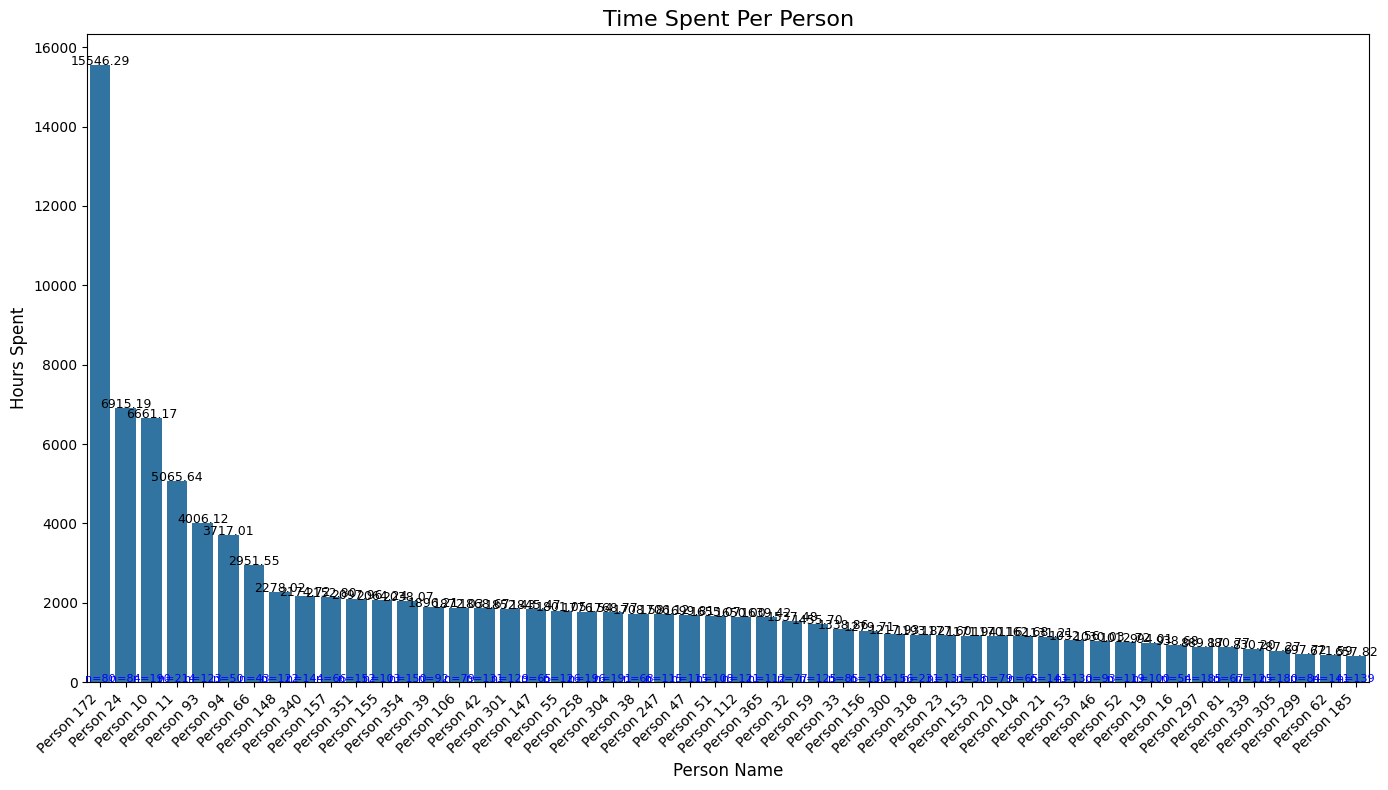

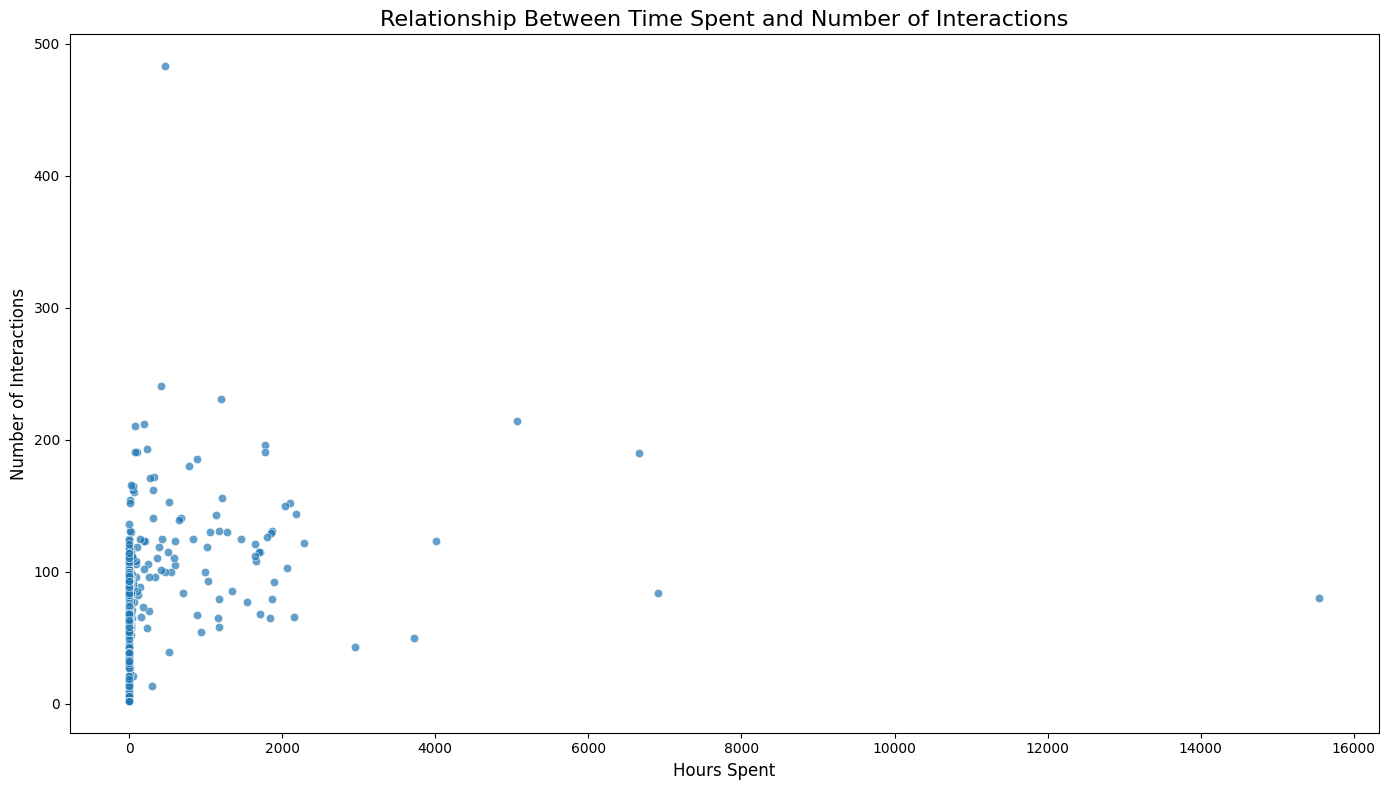


Top 10 users by time spent:
    person_name    hours_used  count               earliest_timestamp  \
81   Person 172  15546.285492     80 2023-01-12 07:38:36.012000+00:00   
156   Person 24   6915.189153     84 2023-06-08 18:28:36.183000+00:00   
1     Person 10   6661.171862    190 2023-02-02 18:09:14.897000+00:00   
12    Person 11   5065.639118    214 2023-10-24 03:54:20.781000+00:00   
397   Person 93   4006.119165    123 2023-06-10 22:19:49.822000+00:00   
398   Person 94   3717.005258     50 2023-06-15 20:02:59.060000+00:00   
367   Person 66   2951.546804     43 2023-08-03 06:38:23.353000+00:00   
54   Person 148   2278.015899    122 2022-11-21 03:32:19.090000+00:00   
268  Person 340   2174.723573    144 2023-11-23 20:35:15.474000+00:00   
64   Person 157   2152.799553     66 2022-11-24 05:43:06.143000+00:00   

                    latest_timestamp  
81  2024-10-21 01:55:43.783000+00:00  
156 2024-03-22 21:39:57.133000+00:00  
1   2023-11-07 07:19:33.600000+00:00  
12  2024-05

In [13]:
# 1. Group by person name and calculate time differences
def calculate_time_spent(df):
    # Extract person name from each record
    df['person_name'] = df['parsed_json'].apply(lambda x: x.get('actor', {}).get('name', 'Unknown'))
    
    # Group by person name and aggregate first/last timestamps
    timestamp_summary = df.groupby('person_name')['parsed_json'].agg(
        earliest_timestamp=lambda x: min(pd.to_datetime([item.get('timestamp') for item in x], errors='coerce')),
        latest_timestamp=lambda x: max(pd.to_datetime([item.get('timestamp') for item in x], errors='coerce')),
        count=lambda x: len(x)  # Count how many interactions each person had
    )
    
    # Calculate time difference
    timestamp_summary['timestamp_diff'] = timestamp_summary['latest_timestamp'] - timestamp_summary['earliest_timestamp']
    
    # Convert to more readable format (hours)
    usage_data = timestamp_summary.reset_index()
    print(f"Using 'person_name' to identify individuals")
    
    # Convert timestamp_diff to hours
    usage_data['hours_used'] = usage_data['timestamp_diff'].dt.total_seconds() / 3600
    
    # Sort by usage duration for better analysis
    usage_data = usage_data.sort_values('hours_used', ascending=False)
    
    return usage_data

# 2. Create the visualization
def plot_time_spent(usage_data, person_col='person_name'):
    # Handle case where there could be many people
    # If more than 20 people, only show top 20 by time spent
    plot_data = usage_data
    if len(usage_data) > 20:
        plot_data = usage_data.head(50)
        print(f"Note: Only showing top 20 people by time spent (out of {len(usage_data)} total)")
    
    plt.figure(figsize=(14, 8))
    
    # Create bar plot
    ax = sns.barplot(x=person_col, y='hours_used', data=plot_data)
    
    # Customize the plot
    plt.title('Time Spent Per Person', fontsize=16)
    plt.xlabel('Person Name', fontsize=12)
    plt.ylabel('Hours Spent', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    
    # Add value labels on top of bars
    for i, bar in enumerate(ax.patches):
        ax.text(
            bar.get_x() + bar.get_width()/2.,
            bar.get_height() + 0.3,
            f"{bar.get_height():.2f}",
            ha='center',
            fontsize=9
        )
    
    # Add count as text below x-axis labels
    for i, (idx, row) in enumerate(plot_data.iterrows()):
        ax.text(
            i,
            -0.3,
            f"n={row['count']}",
            ha='center',
            fontsize=8,
            color='blue'
        )
    
    plt.tight_layout()
    plt.savefig('time_spent_per_person.png')
    plt.show()
    
    # Create additional plot showing interaction count
    plt.figure(figsize=(14, 8))
    ax2 = sns.scatterplot(x='hours_used', y='count', data=usage_data, alpha=0.7)
    
    # # Add person labels to points
    # for i, (idx, row) in enumerate(usage_data.iterrows()):
    #     ax2.text(
    #         row['hours_used'] + 0.1,
    #         row['count'],
    #         row[person_col],
    #         fontsize=8
    #     )
    
    plt.title('Relationship Between Time Spent and Number of Interactions', fontsize=16)
    plt.xlabel('Hours Spent', fontsize=12)
    plt.ylabel('Number of Interactions', fontsize=12)
    plt.tight_layout()
    plt.savefig('time_vs_interactions.png')
    plt.show()
    
    return ax

# Example usage
if __name__ == "__main__":
    
    # Calculate time spent
    usage_data = calculate_time_spent(df)
    
    # Print summary
    print("\nTime spent summary:")
    print(usage_data[['hours_used', 'count']].describe())
    
    # Plot the results
    plot_time_spent(usage_data, 'person_name')
    
    # Output the top 10 users by time spent
    print("\nTop 10 users by time spent:")
    print(usage_data[['person_name', 'hours_used', 'count', 'earliest_timestamp', 'latest_timestamp']].head(10))

### Time spent per session

In [9]:
timestamp_summary = df.groupby(df['parsed_json'].apply(lambda x: x.get('context', {}).get('registration')))['parsed_json'].agg(
   earliest_timestamp=lambda x: min(pd.to_datetime([item.get('timestamp') for item in x], format='ISO8601')),
   latest_timestamp=lambda x: max(pd.to_datetime([item.get('timestamp') for item in x], format='ISO8601')),
   timestamp_diff = lambda x: max(pd.to_datetime([item.get('timestamp') for item in x], format='ISO8601')) - min(pd.to_datetime([item.get('timestamp') for item in x], format='ISO8601'))
)

print(timestamp_summary)

                                                   earliest_timestamp  \
parsed_json                                                             
0023f6fd-7854-4040-ae3b-43b89f793d6e 2023-11-15 04:09:26.287000+00:00   
01407217-aefb-466e-9b87-640551918314 2023-10-22 16:27:22.306000+00:00   
016cb519-aae5-4cb6-a85a-61709d8ad194 2023-07-09 01:34:21.521000+00:00   
024d4f72-885e-4229-9990-846c88625ce0 2023-04-23 23:57:11.940000+00:00   
02fba4a7-f349-482f-93cd-ad36a4c357da 2023-07-13 20:06:18.028000+00:00   
...                                                               ...   
fde90b68-beca-41f9-b3cd-9607515e82d8 2022-11-24 03:59:22.422000+00:00   
fe6bdf7a-9d55-4a24-9549-a510fd14cd72 2023-05-14 17:17:01.252000+00:00   
fea3c365-0d2d-48d5-95c5-6614d7643a25 2023-07-13 02:14:58.228000+00:00   
ff092512-dd0e-4fa5-8f94-243162181db1 2024-10-30 20:33:01.703000+00:00   
ff236595-2d4b-4f86-b372-e96dcdedb0de 2023-07-09 23:22:47.607000+00:00   

                                                  

In [13]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
# import numpy as np

usage_data = timestamp_summary.reset_index()

registration_col = usage_data.columns[0]  # First column after reset_index()
print(f"Using column '{registration_col}' as registration ID")

# Convert timestamp_diff to hours for better readability
usage_data['hours_used'] = usage_data['timestamp_diff'].dt.total_seconds() / 3600

# Sort by usage duration for better visualization
usage_data = usage_data.sort_values('hours_used', ascending=False)

Using column 'parsed_json' as registration ID


In [26]:
# Filter data to only include sessions under 1 hour
clean_sessions = usage_data[usage_data['hours_used'] <= 1]

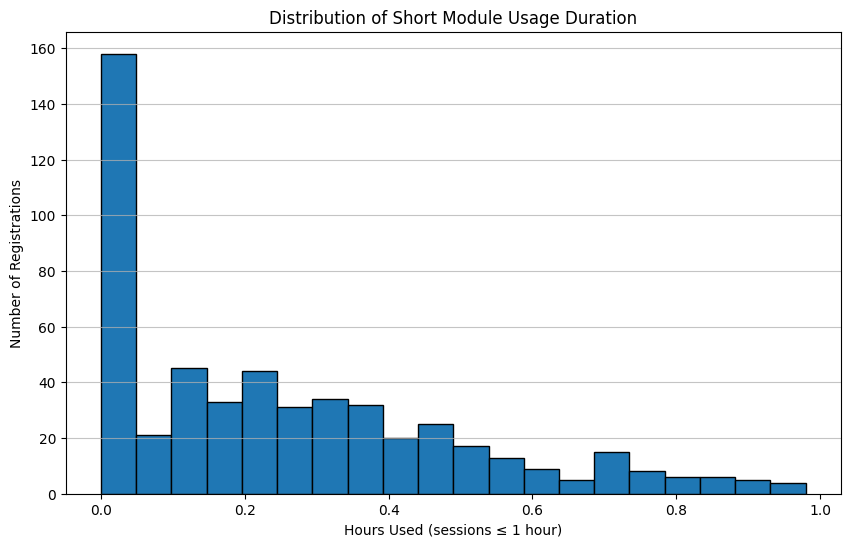

In [34]:
# Plot 2: Histogram of usage durations
plt.figure(figsize=(10, 6))
plt.hist(clean_sessions['hours_used'], bins=20, edgecolor='black')
plt.xlabel('Hours Used (sessions ≤ 1 hour)')
plt.ylabel('Number of Registrations')
plt.title('Distribution of Short Module Usage Duration')
plt.grid(axis='y', alpha=0.75)
# No plt.close() to allow display in notebook

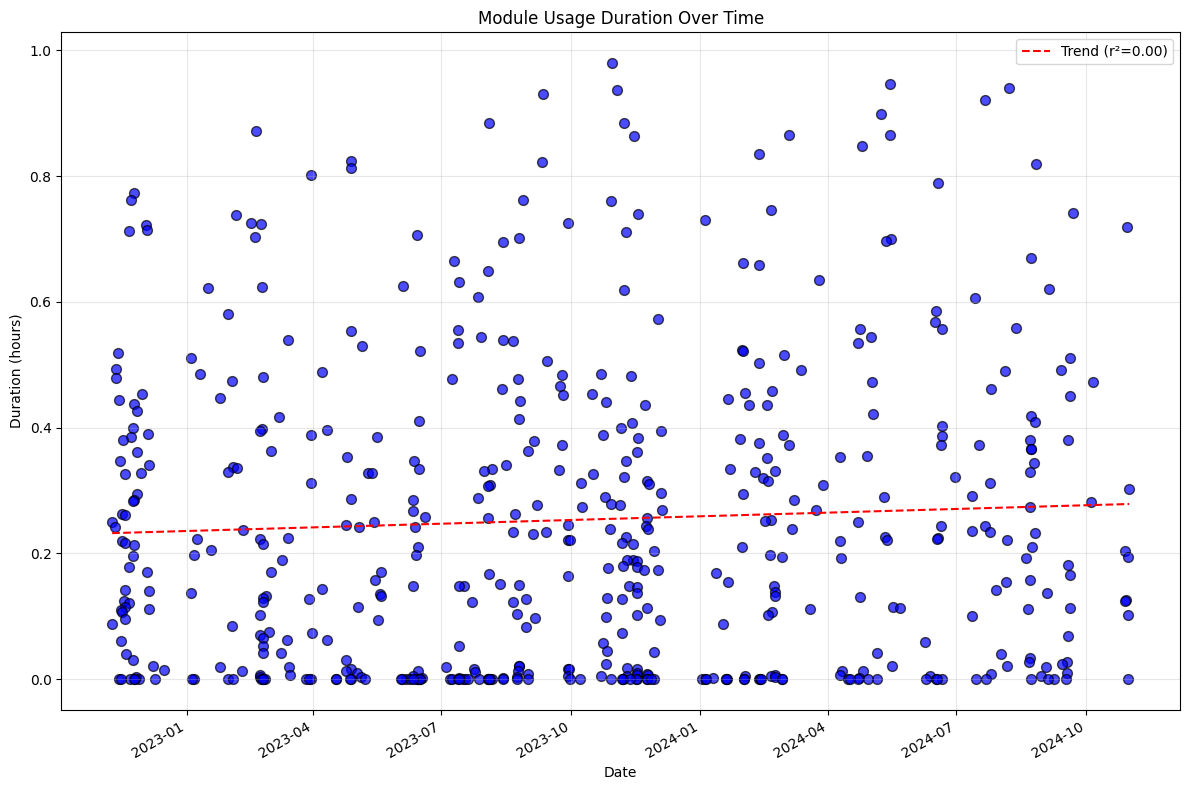

In [32]:
# Ensure matplotlib is set for inline display
%matplotlib inline

# Create a scatter plot with dates on x-axis and duration on y-axis
plt.figure(figsize=(12, 8))

# Use the earliest_timestamp for each registration as the x-value
plt.scatter(clean_sessions['earliest_timestamp'], clean_sessions['hours_used'], 
            alpha=0.7, s=50, c='blue', edgecolors='black')

# Format the plot
plt.xlabel('Date')
plt.ylabel('Duration (hours)')
plt.title('Module Usage Duration Over Time')
plt.grid(True, alpha=0.3)

# Format the date axis
plt.gcf().autofmt_xdate()  # Auto-format the x-axis date labels

# Add a trend line if desired
try:
    from scipy import stats
    # Convert dates to numbers for regression
    import matplotlib.dates as mdates
    x_numeric = mdates.date2num(clean_sessions['earliest_timestamp'])
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_numeric, clean_sessions['hours_used'])
    
    # Create line function
    def line(x):
        return slope * x + intercept
    
    # Plot regression line
    fit_x = np.array([min(x_numeric), max(x_numeric)])
    fit_y = line(fit_x)
    plt.plot(mdates.num2date(fit_x), fit_y, 'r--', 
             label=f'Trend (r²={r_value**2:.2f})')
    plt.legend()
except:
    # Skip trend line if scipy not available
    pass

plt.tight_layout()

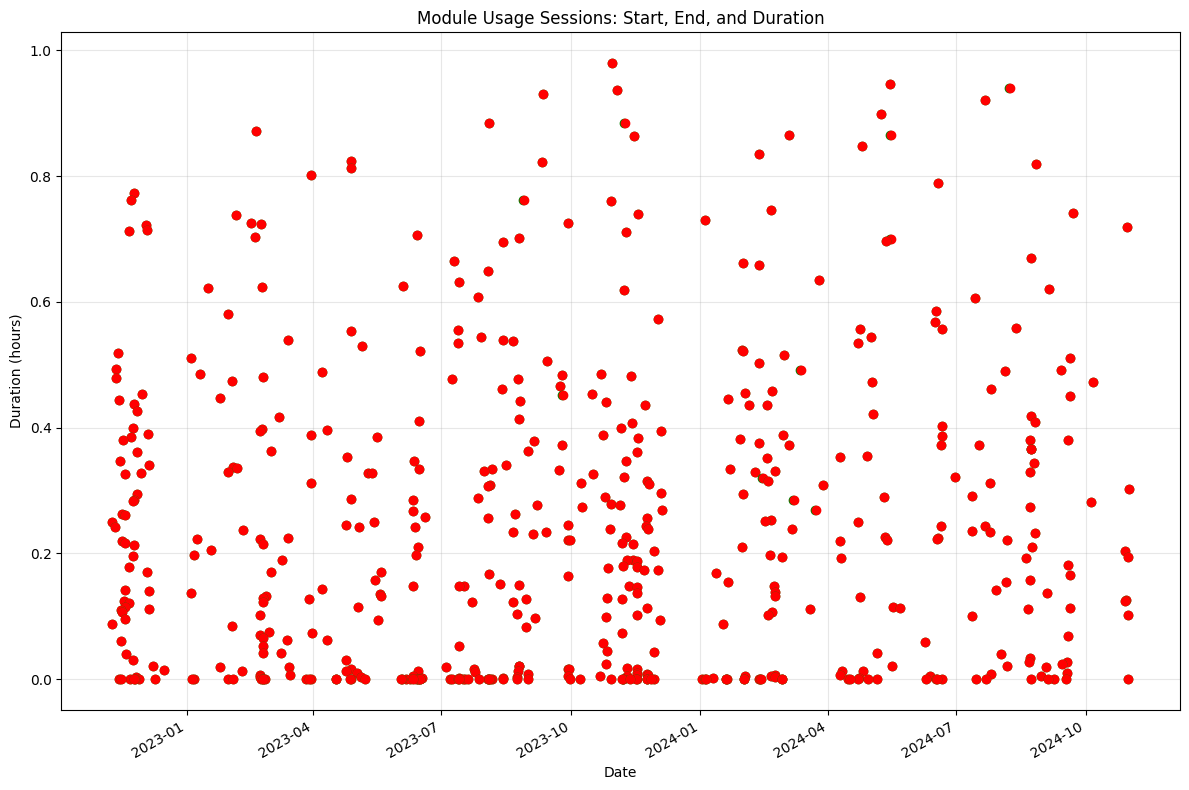

In [33]:
# Create start/end visualization
plt.figure(figsize=(12, 8))

# For each registration, draw a line from start to end
for i, (idx, row) in enumerate(clean_sessions.iterrows()):
    start = row['earliest_timestamp']
    # Calculate end by adding the duration
    end = row['latest_timestamp']
    
    # Plot horizontal line showing the session length
    plt.plot([start, end], [row['hours_used'], row['hours_used']], 
             '-', linewidth=2, alpha=0.7)
    
    # Add markers for start and end points
    plt.plot(start, row['hours_used'], 'o', markersize=6, color='green')
    plt.plot(end, row['hours_used'], 'o', markersize=6, color='red')

plt.xlabel('Date')
plt.ylabel('Duration (hours)')
plt.title('Module Usage Sessions: Start, End, and Duration')
plt.grid(True, alpha=0.3)
plt.gcf().autofmt_xdate()

plt.tight_layout()

### Time Spent per person (aggregate)

Excluded top outlier with 15546.3 hours
Showing top 50 people (after excluding outlier)


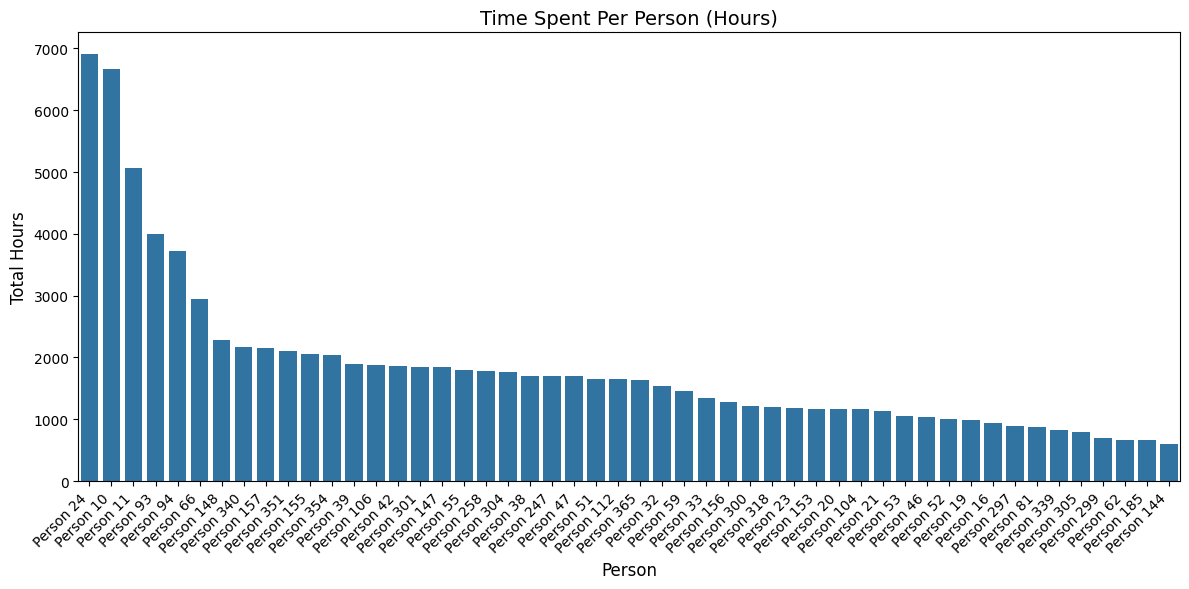

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def create_person_time_graph(usage_data):
    """
    Takes the existing usage_data DataFrame and creates a bar graph of 
    time spent per person, excluding the top outlier.
    
    Args:
        usage_data: DataFrame with registration-level time data
                   (should have 'hours_used' column and person identifier)
    """
    # Extract the person name from the registration data
    person_col = 'person_name'
    
    # Aggregate the time by person
    person_totals = usage_data.groupby(person_col)['hours_used'].sum().reset_index()
    
    # Sort by total hours (descending)
    person_totals = person_totals.sort_values('hours_used', ascending=False)
    
    # Remove the top outlier
    if len(person_totals) > 1:
        outlier_value = person_totals.iloc[0]['hours_used']
        print(f"Excluded top outlier with {outlier_value:.1f} hours")
        plot_data = person_totals.iloc[1:]
    else:
        plot_data = person_totals
    

    plot_data = plot_data.head(50)
    print(f"Showing top 50 people (after excluding outlier)")
    
    # Create the bar graph
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=person_col, y='hours_used', data=plot_data)
    
    # Customize the plot
    plt.title('Time Spent Per Person (Hours)', fontsize=14)
    plt.xlabel('Person', fontsize=12)
    plt.ylabel('Total Hours', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    
    # # Add value labels on top of bars
    # for i, bar in enumerate(ax.patches):
    #     ax.text(
    #         bar.get_x() + bar.get_width()/2.,
    #         bar.get_height() + 0.1,
    #         f"{bar.get_height():.1f}",
    #         ha='center',
    #         fontsize=9
    #     )
    
    plt.tight_layout()
    plt.savefig('time_spent_per_person.png')
    plt.show()
    
    return ax

# Example usage
if __name__ == "__main__":
    # Assuming you've already run your code to create usage_data
    '''
    timestamp_summary = df.groupby(df['parsed_json'].apply(lambda x: x.get('context', {}).get('registration')))['parsed_json'].agg(
        earliest_timestamp=lambda x: min(pd.to_datetime([item.get('timestamp') for item in x], format='ISO8601')),
        latest_timestamp=lambda x: max(pd.to_datetime([item.get('timestamp') for item in x], format='ISO8601')),
        timestamp_diff = lambda x: max(pd.to_datetime([item.get('timestamp') for item in x], format='ISO8601')) - min(pd.to_datetime([item.get('timestamp') for item in x], format='ISO8601'))
    )

    usage_data = timestamp_summary.reset_index()
    registration_col = usage_data.columns[0]  # First column after reset_index()
    print(f"Using column '{registration_col}' as registration ID")
    # Convert timestamp_diff to hours for better readability
    usage_data['hours_used'] = usage_data['timestamp_diff'].dt.total_seconds() / 3600
    # Sort by usage duration for better visualization
    usage_data = usage_data.sort_values('hours_used', ascending=False)
    '''
    
    # Now create the bar graph using the existing data
    create_person_time_graph(usage_data)

Found 214 people with less than 1.0 hour(s) total time


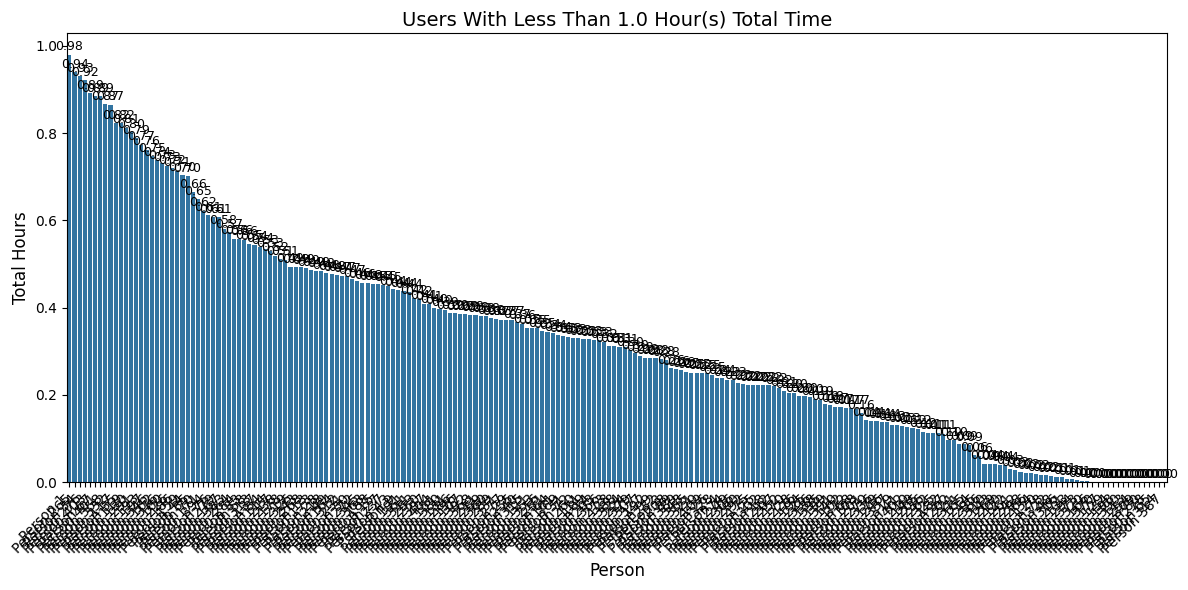


Detailed information about users with short engagement:
    person_name  hours_used
0      Person 1    0.979869
184  Person 265    0.940324
267   Person 34    0.930052
196  Person 276    0.921329
338  Person 403    0.891748
..          ...         ...
383   Person 80    0.000033
198  Person 278    0.000032
366   Person 65    0.000031
239  Person 314    0.000030
319  Person 387    0.000024

[214 rows x 2 columns]


NameError: name 'filtered_data' is not defined

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def create_filtered_graph(usage_data, hour_threshold=1.0):
    """
    Creates a bar graph showing only users who spent less than
    the specified hour threshold in total.
    
    Args:
        usage_data: DataFrame with registration-level time data
        hour_threshold: Maximum hours to include (default: 1.0)
    """
    # First, aggregate by person if needed
    if 'person_name' in usage_data.columns:
        person_col = 'person_name'
    else:
        # Use registration as fallback
        registration_col = usage_data.columns[0]  
        person_col = registration_col
    
    # Aggregate the time by person
    person_totals = usage_data.groupby(person_col)['hours_used'].sum().reset_index()
    
    # Filter to only include people with less than the threshold
    filtered_data = person_totals[person_totals['hours_used'] < hour_threshold]
    
    # Sort by hours (descending)
    filtered_data = filtered_data.sort_values('hours_used', ascending=False)
    
    print(f"Found {len(filtered_data)} people with less than {hour_threshold} hour(s) total time")
    
    if len(filtered_data) == 0:
        print("No data to display after filtering.")
        return None
    
    # Create the bar graph
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=person_col, y='hours_used', data=filtered_data)
    
    # Customize the plot
    plt.title(f'Users With Less Than {hour_threshold} Hour(s) Total Time', fontsize=14)
    plt.xlabel('Person', fontsize=12)
    plt.ylabel('Total Hours', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    
    # Add value labels on top of bars
    for i, bar in enumerate(ax.patches):
        ax.text(
            bar.get_x() + bar.get_width()/2.,
            bar.get_height() + 0.01,
            f"{bar.get_height():.2f}",
            ha='center',
            fontsize=9
        )
    
    plt.tight_layout()
    plt.savefig('short_time_users.png')
    plt.show()
    
    return filtered_data

# Example usage
if __name__ == "__main__":
    # After you've already run your code to create usage_data
    
    # Filter and create graph for users with less than 1 hour total time
    short_time_users = create_filtered_graph(usage_data, hour_threshold=1.0)
    
    # Print detailed information about these users if needed
    if short_time_users is not None and len(short_time_users) > 0:
        print("\nDetailed information about users with short engagement:")
        print(short_time_users)




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def create_improved_all_users_graph(filtered_data, hour_threshold=1.0):
    """
    Creates a cleaner bar graph showing ALL users with less than the threshold time,
    with a horizontal reference line at 30 minutes.
    
    Args:
        filtered_data: DataFrame with person and hours_used columns
        hour_threshold: Maximum hours to include (default: 1.0)
    """
    # Sort data by hours used (descending)
    plot_data = filtered_data.sort_values('hours_used', ascending=False).reset_index(drop=True)
    
    plt.figure(figsize=(16, 8))
    
    # Create a bar plot with all users
    ax = sns.barplot(x=plot_data.index, y='hours_used', data=plot_data, 
                    palette='Blues_d', width=0.8)
    
    # Add a horizontal line at 30 minutes (0.5 hours)
    plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.7, 
               linewidth=2, label='30 Minute Mark')
    
    # Customize the plot
    plt.title(f'All {len(filtered_data)} Users With Less Than {hour_threshold} Hour Total Time', 
              fontsize=16, pad=20)
    plt.xlabel('User Index (Sorted by Time Spent)', fontsize=14)
    plt.ylabel('Total Hours', fontsize=14)
    
    # Clean up x-axis by showing fewer labels
    # Only show a few markers on the x-axis
    num_ticks = 5
    step_size = len(plot_data) // num_ticks
    plt.xticks([i for i in range(0, len(plot_data), step_size)], 
               [i for i in range(0, len(plot_data), step_size)])
    
    # Add a legend for the 30-minute line
    plt.legend(fontsize=12)
    
    # Add grid lines for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    
    # Set y-axis limits with a little padding
    plt.ylim(0, hour_threshold * 1.05)
    
    # Add annotations for extremes
    max_value = plot_data['hours_used'].max()
    min_value = plot_data['hours_used'].min()
    
    # Annotate max value
    plt.annotate(f'Max: {max_value:.2f} hours',
                xy=(0, max_value),
                xytext=(10, 5),
                textcoords='offset points',
                fontsize=10,
                bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.3))
    
    # Annotate min value
    plt.annotate(f'Min: {min_value:.2f} hours',
                xy=(len(plot_data)-1, min_value),
                xytext=(-10, 5),
                textcoords='offset points',
                fontsize=10,
                ha='right',
                bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.3))
    
    # Add text showing time statistics
    above_30min = (plot_data['hours_used'] >= 0.5).sum()
    below_30min = (plot_data['hours_used'] < 0.5).sum()
    
    stats_text = (f"Users above 30 minutes: {above_30min} ({above_30min/len(plot_data):.1%})\n"
                  f"Users below 30 minutes: {below_30min} ({below_30min/len(plot_data):.1%})")
    
    plt.annotate(stats_text,
                xy=(0.02, 0.02),
                xycoords='figure fraction',
                fontsize=12,
                bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8))
    
    plt.tight_layout()
    plt.savefig('all_short_time_users.png', dpi=300)
    plt.show()
    
    # ALTERNATIVE: Create a line plot for smoother visualization
    plt.figure(figsize=(16, 8))
    
    # Create line plot
    plt.plot(plot_data.index, plot_data['hours_used'], '-', 
             color='blue', linewidth=2, alpha=0.7)
    
    # Add a horizontal line at 30 minutes
    plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.7, 
               linewidth=2, label='30 Minute Mark')
    
    # Customize the plot
    plt.title(f'Time Spent Distribution: All {len(filtered_data)} Users Under {hour_threshold} Hour', 
              fontsize=16, pad=20)
    plt.xlabel('User Rank (Sorted by Time Spent)', fontsize=14)
    plt.ylabel('Total Hours', fontsize=14)
    
    # Add grid for better readability
    plt.grid(linestyle='--', alpha=0.3)
    
    # Set y-axis limits
    plt.ylim(0, hour_threshold * 1.05)
    
    # Clean up x-axis by showing fewer labels
    num_ticks = 5
    step_size = len(plot_data) // num_ticks
    plt.xticks([i for i in range(0, len(plot_data), step_size)], 
               [i for i in range(0, len(plot_data), step_size)])
    
    # Add a legend for the 30-minute line
    plt.legend(fontsize=12)
    
    # Add annotations
    # Add text showing time statistics
    plt.annotate(stats_text,
                xy=(0.02, 0.02),
                xycoords='figure fraction',
                fontsize=12,
                bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8))
    
    plt.tight_layout()
    plt.savefig('line_all_short_time_users.png', dpi=300)
    plt.show()

# Example usage
if __name__ == "__main__":
    # Use your existing filtered data from earlier
    create_improved_all_users_graph(filtered_data)  # replace filtered_data with your variable name

### Sessions per user

In [37]:
# Extract registrations
unique_registrations = pd.DataFrame({
    'Name': df['parsed_json'].apply(lambda x: x.get('actor', {}).get('name') if x else None),
    'Registrations': df['parsed_json'].apply(lambda x: x.get('context', {}).get('registration') if x else None)
}).apply(pd.Series)

different_registrations = unique_registrations.drop_duplicates().reset_index(drop=True)

registration_counts = different_registrations.groupby('Name').size().reset_index(name='Count')
registration_counts.sort_values(by='Count', ascending = True)

,Name,Count
392,Person 89,1
391,Person 88,1
390,Person 87,1
389,Person 86,1
388,Person 85,1
...,...,...
100,Person 19,5
397,Person 93,5
371,Person 7,5
350,Person 50,6


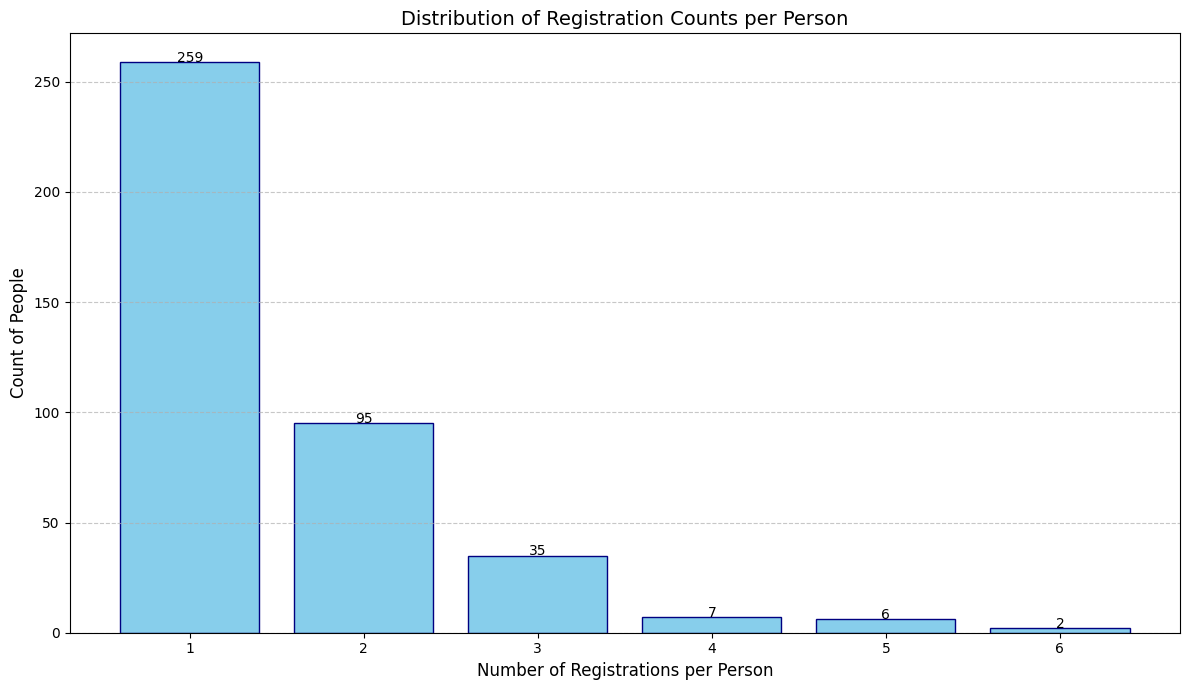

In [38]:
# Create a count of people with each number of registrations
people_per_registration_count = registration_counts['Count'].value_counts().reset_index()
people_per_registration_count.columns = ['Number of Registrations', 'Count of People']
people_per_registration_count = people_per_registration_count.sort_values('Number of Registrations')

# Plot it
plt.figure(figsize=(12, 7))
plt.bar(people_per_registration_count['Number of Registrations'], 
        people_per_registration_count['Count of People'],
        color='skyblue', edgecolor='navy')

plt.xlabel('Number of Registrations per Person', fontsize=12)
plt.ylabel('Count of People', fontsize=12)
plt.title('Distribution of Registration Counts per Person', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of bars
for i, v in enumerate(people_per_registration_count['Count of People']):
    plt.text(people_per_registration_count['Number of Registrations'].iloc[i], 
             v + 0.1, 
             str(v), 
             ha='center')

# Ensure x-axis uses integer ticks for number of registrations
plt.xticks(people_per_registration_count['Number of Registrations'])

plt.tight_layout()

### Attempts per user

Total encounters with 'Mr. Kato's Vision Loss': 101

Count by person:
   person_name  count
1    Person 10      3
75   Person 79      3
17  Person 156      2
21  Person 168      2
24  Person 172      2
..         ...    ...
81   Person 91      1
82   Person 93      1
83   Person 95      1
84   Person 98      1
85   Person 99      1

[86 rows x 2 columns]


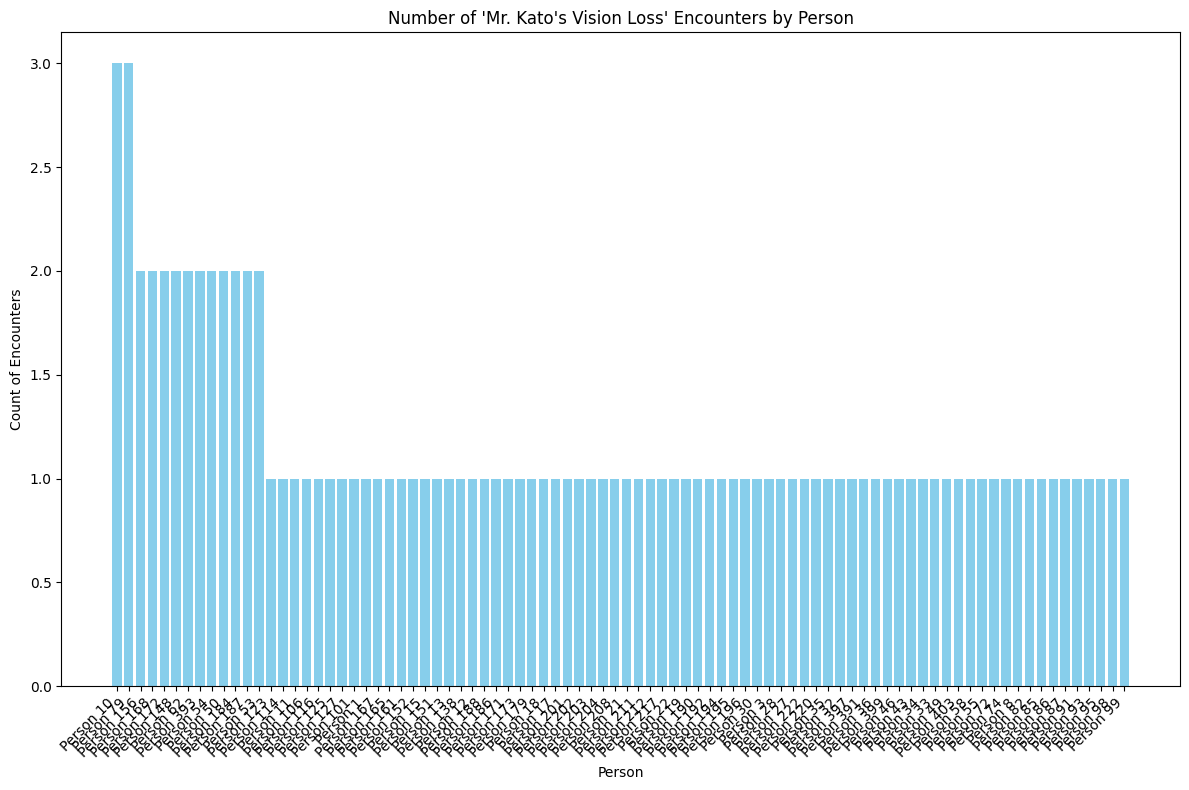

In [46]:
# Function to check if "Mr. Kato's Vision Loss" is in the description
def has_kato_vision_loss(json_obj):
    try:
        # Navigate through the JSON structure to find the description
        description = json_obj.get('object', {}).get('definition', {}).get('description', {}).get('und', '')
        
        # Check if the text is in the description (case insensitive)
        return "Mr Kato's Vision Loss".lower() in description.lower()
    except:
        return False

# Function to extract person name
def get_person_name(json_obj):
    try:
        return json_obj.get('actor', {}).get('name', 'Unknown')
    except:
        return 'Unknown'

# Apply the functions to create new columns
df['has_kato'] = df['parsed_json'].apply(has_kato_vision_loss)
df['person_name'] = df['parsed_json'].apply(get_person_name)

# Filter to only rows with Mr. Kato's Vision Loss
kato_df = df[df['has_kato']]

# Count occurrences by person
kato_counts = kato_df.groupby('person_name').size().reset_index(name='count')

# Sort by count in descending order
kato_counts = kato_counts.sort_values('count', ascending=False)

# Display the counts
print(f"Total encounters with 'Mr. Kato's Vision Loss': {len(kato_df)}")
print("\nCount by person:")
print(kato_counts)

# Visualize the results
plt.figure(figsize=(12, 8))
top_people = kato_counts.head(404)
plt.bar(top_people['person_name'], top_people['count'], color='skyblue')
plt.xlabel('Person')
plt.ylabel('Count of Encounters')
plt.title("Number of 'Mr. Kato's Vision Loss' Encounters by Person")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

### Text content per user

In [49]:
# split data frame into two.
# One df has responses and other does not
# Slides requiring some sort of response registers two rows; whether the slide is 'experienced' and the response

# Check if each row has a 'response' field in the 'result' section
has_response = df['parsed_json'].apply(
    lambda x: isinstance(x, dict) and
              isinstance(x.get('result'), dict) and
              'response' in x.get('result', {})
)

# Split the dataframe into two
df_with_response = df[has_response].copy()
df_without_response = df[~has_response].copy()

df_with_response.to_csv('df_with_response.csv', index=False)

In [50]:
# Filter for rows where 'result' contains 'response' but not 'success'
response_only_rows = df[df['parsed_json'].apply(
    lambda x: (
        isinstance(x, dict) and
        isinstance(x.get('result'), dict) and
        'response' in x.get('result', {}) and
        'success' not in x.get('result', {})
    )
)]

# Print information about the filtered data
print(f"Total rows with only 'response' in result (no success): {len(response_only_rows)}")

# Extract key information from these responses
response_data = response_only_rows['parsed_json'].apply(
    lambda x: {
        'person_name': x.get('actor', {}).get('name'),
        'response': x.get('result', {}).get('response'),
        'object_name': next(iter(x.get('object', {}).get('definition', {}).get('name', {}).values()), None)
    }
)

# Convert to a proper dataframe
response_df = pd.DataFrame(response_data.tolist())

# Sample of the responses
print("\nSample of responses without 'success' field:")
print(response_df.head())

Total rows with only 'response' in result (no success): 5117

Sample of responses without 'success' field:
  person_name                                           response  \
0    Person 1  requires further investigation, may need to do...   
1    Person 1                 macular degeneration and cataracts   
2    Person 1                                 slit lamp, optomap   
3    Person 1                                 slit lamp, optomap   
4    Person 1  fundoscopy, visual acuity, visual fields, pupi...   

                                         object_name  
0                                              Essay  
1  You’ve taken a good history, and done a physic...  
2   You made these three corrections and still ca...  
3  You are having a hard time getting a good look...  
4       What are you going to check in the eye exam?  


### Depth of Module Usage

Total number of unique slides (descriptions): 54

Sample of unique descriptions (first 10):
1. Mr Kato's Vision Loss
2. 
3. Survey
4. Learning Review
5. Epilogue
6. Drag and Drop
7. Practice: Matching Treatments
8. Text Entry Interaction
9. Patient Referral
10. Case Overview

Number of unique slides viewed by each person:
         Person  Unique Slides Viewed
0      Person 1                    54
382    Person 8                    54
31   Person 127                    54
376   Person 74                    54
381   Person 79                    54
..          ...                   ...
61   Person 154                     2
366   Person 65                     2
33   Person 129                     2
28   Person 124                     2
383   Person 80                     2

[404 rows x 2 columns]

Summary Statistics for Unique Slides Viewed:
count    404.000000
mean      45.465347
std       14.484227
min        2.000000
25%       50.000000
50%       51.000000
75%       52.000000
max       

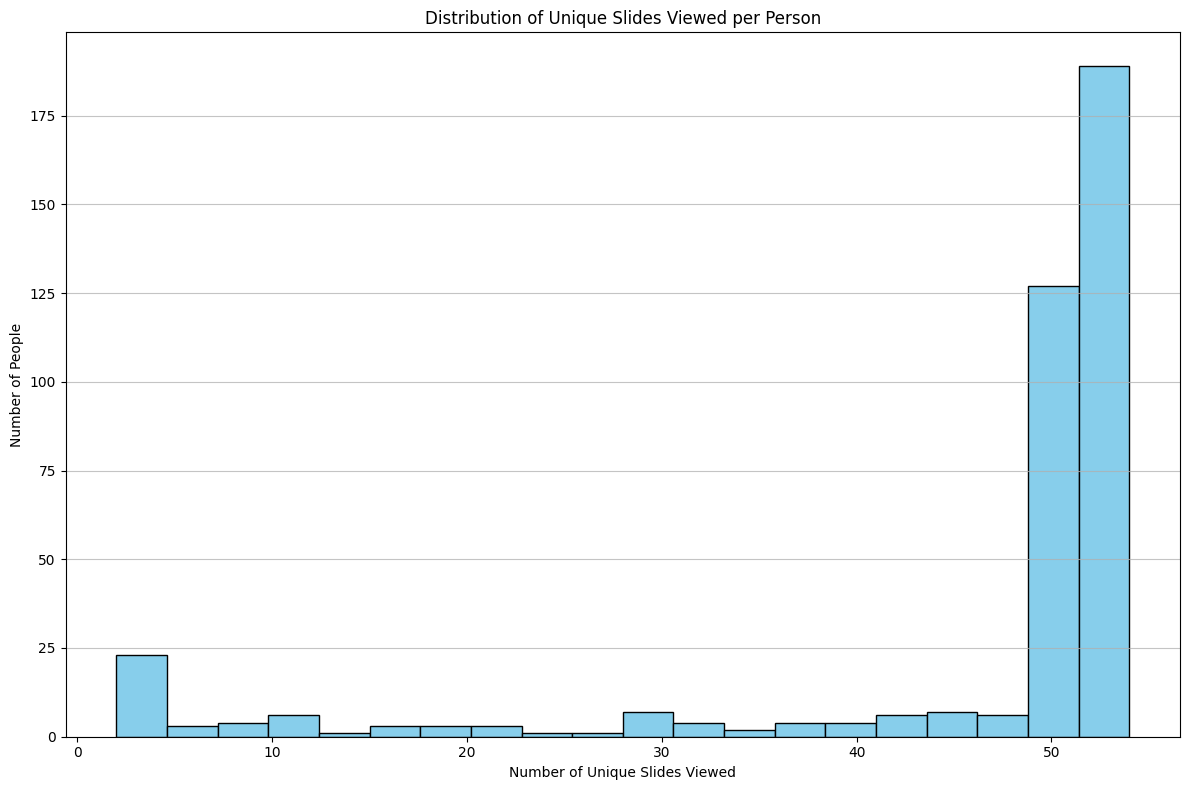

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to extract description from parsed_json
def get_description(json_obj):
    try:
        # Navigate through the JSON structure to find the description
        return json_obj.get('object', {}).get('definition', {}).get('description', {}).get('und', '')
    except:
        return ''

# Function to extract person name
def get_person_name(json_obj):
    try:
        return json_obj.get('actor', {}).get('name', 'Unknown')
    except:
        return 'Unknown'

# Apply the functions to create new columns
# Let's assume df_without_response is your dataframe
# If using df instead, just replace df_without_response with df
df_without_response = df.copy()  # Make a copy of df if df_without_response doesn't exist
df_without_response['description'] = df_without_response['parsed_json'].apply(get_description)
df_without_response['person_name'] = df_without_response['parsed_json'].apply(get_person_name)

# Get list of all unique descriptions (slides)
unique_descriptions = df_without_response['description'].unique()
print(f"Total number of unique slides (descriptions): {len(unique_descriptions)}")

# Print first 10 unique descriptions to see what they look like
print("\nSample of unique descriptions (first 10):")
for i, desc in enumerate(unique_descriptions[:10]):
    print(f"{i+1}. {desc}")

# Now count how many unique slides each person viewed
# Group by person and get unique descriptions
slides_per_person = df_without_response.groupby('person_name')['description'].nunique().reset_index()
slides_per_person.columns = ['Person', 'Unique Slides Viewed']

# Sort by number of slides viewed in descending order
slides_per_person = slides_per_person.sort_values('Unique Slides Viewed', ascending=False)

# Display the counts
print("\nNumber of unique slides viewed by each person:")
print(slides_per_person)

# Create a visualization
plt.figure(figsize=(12, 8))
plt.hist(slides_per_person['Unique Slides Viewed'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Unique Slides Viewed')
plt.ylabel('Number of People')
plt.title('Distribution of Unique Slides Viewed per Person')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()

# Create a summary statistics table
stats_summary = slides_per_person['Unique Slides Viewed'].describe()
print("\nSummary Statistics for Unique Slides Viewed:")
print(stats_summary)

Total number of slide views across all people: 32584

Total number of slides viewed by each person:
    person_name  Total Slides Viewed
350   Person 50                  483
281  Person 352                  241
243  Person 318                  231
12    Person 11                  214
18   Person 115                  212
..          ...                  ...
301  Person 370                    2
86   Person 177                    2
366   Person 65                    2
33   Person 129                    2
383   Person 80                    2

[404 rows x 2 columns]

Summary Statistics for Total Slides Viewed:
count    404.000000
mean      80.653465
std       46.455654
min        2.000000
25%       57.000000
50%       78.500000
75%      100.000000
max      483.000000
Name: Total Slides Viewed, dtype: float64


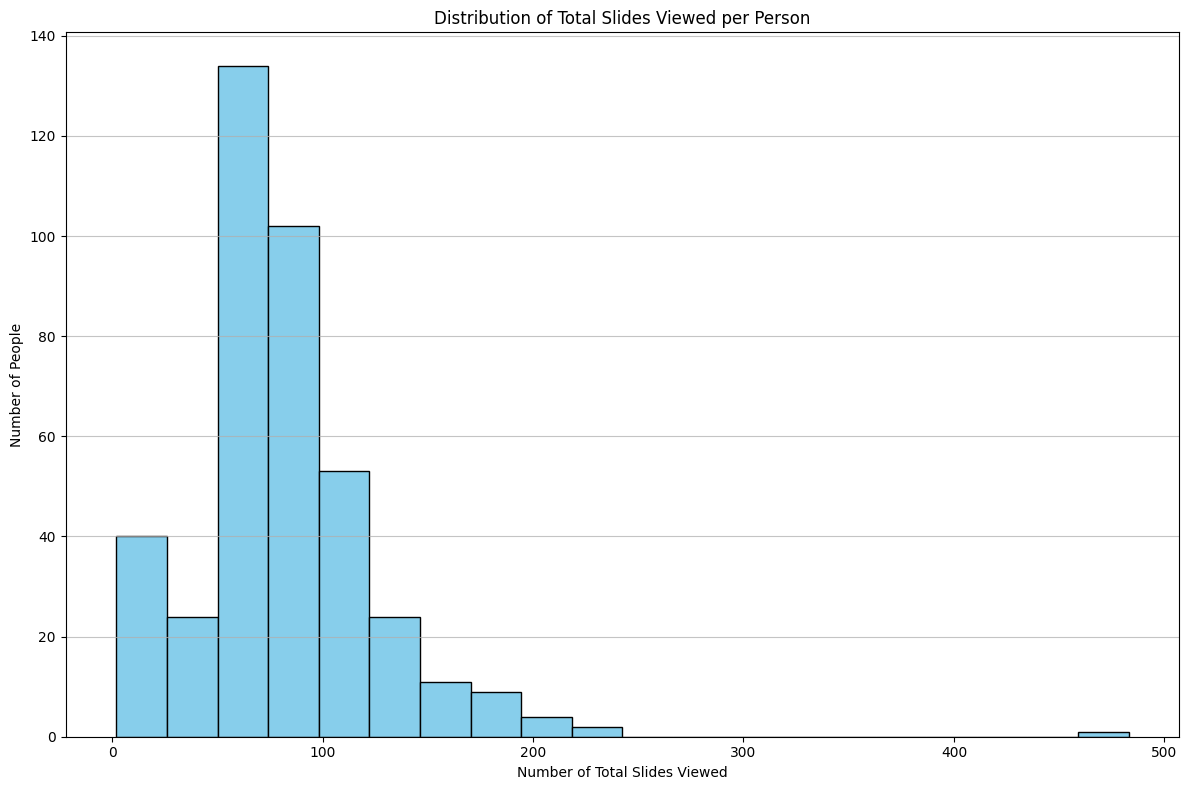

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to extract description from parsed_json
def get_description(json_obj):
    try:
        # Navigate through the JSON structure to find the description
        return json_obj.get('object', {}).get('definition', {}).get('description', {}).get('und', '')
    except:
        return ''

# Function to extract person name
def get_person_name(json_obj):
    try:
        return json_obj.get('actor', {}).get('name', 'Unknown')
    except:
        return 'Unknown'

# Apply the functions to create new columns
df_without_response = df.copy()  # Make a copy of df if df_without_response doesn't exist
df_without_response['description'] = df_without_response['parsed_json'].apply(get_description)
df_without_response['person_name'] = df_without_response['parsed_json'].apply(get_person_name)

# Count total number of slides in the dataset
total_slide_views = len(df_without_response)
print(f"Total number of slide views across all people: {total_slide_views}")

# Count total slides viewed by each person (including duplicates)
total_slides_per_person = df_without_response.groupby('person_name').size().reset_index(name='Total Slides Viewed')

# Sort by number of slides viewed in descending order
total_slides_per_person = total_slides_per_person.sort_values('Total Slides Viewed', ascending=False)

# Display the counts
print("\nTotal number of slides viewed by each person:")
print(total_slides_per_person)

# Create a histogram visualization
plt.figure(figsize=(12, 8))
plt.hist(total_slides_per_person['Total Slides Viewed'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Total Slides Viewed')
plt.ylabel('Number of People')
plt.title('Distribution of Total Slides Viewed per Person')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()

# Create a summary statistics table
stats_summary = total_slides_per_person['Total Slides Viewed'].describe()
print("\nSummary Statistics for Total Slides Viewed:")
print(stats_summary)

### Plot number of users over time

/tmp/ipykernel_230/2050421648.py:45: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_users['total_users'] = daily_users['total_users'].fillna(method='ffill')
/tmp/ipykernel_230/2050421648.py:85: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_growth = user_growth.set_index('timestamp').resample('M').count()


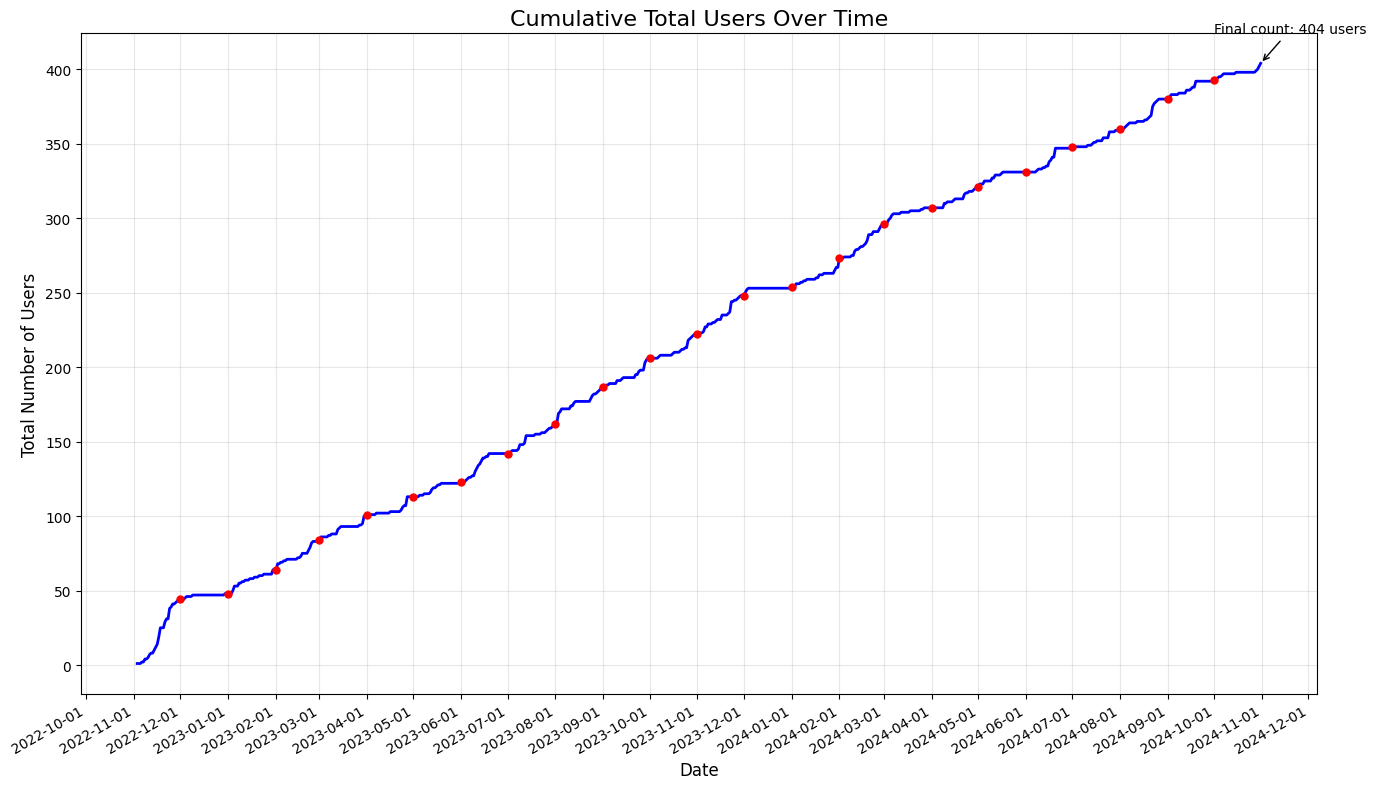

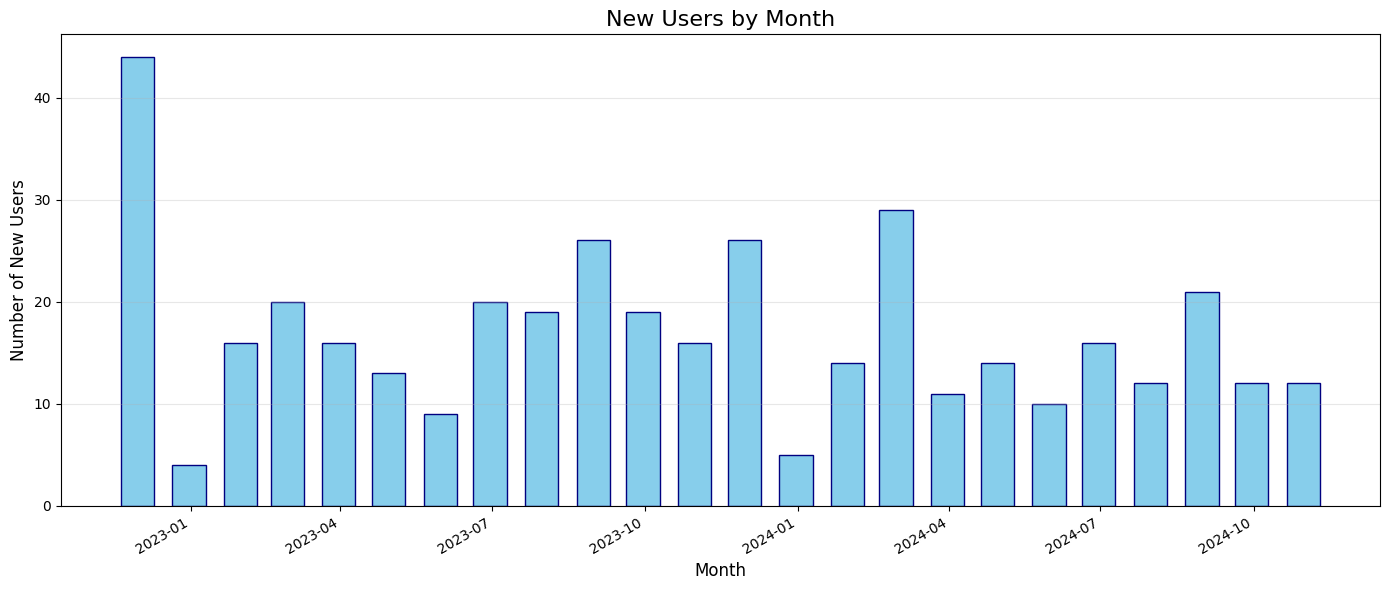

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime

# Create separate functions to extract timestamp and person
def extract_timestamp(json_obj):
    try:
        return json_obj.get('timestamp', '')
    except:
        return ''

def extract_person(json_obj):
    try:
        return json_obj.get('actor', {}).get('name', 'Unknown')
    except:
        return 'Unknown'

# Apply the functions to create new columns
df['timestamp_str'] = df['parsed_json'].apply(extract_timestamp)
df['person_name'] = df['parsed_json'].apply(extract_person)

# Convert timestamp strings to datetime objects
df['timestamp'] = pd.to_datetime(df['timestamp_str'])

# Sort by timestamp
df = df.sort_values('timestamp')

# Get the first appearance of each unique user
first_appearances = df.drop_duplicates(subset=['person_name'])['timestamp']

# Create a time series of cumulative user count
user_growth = pd.DataFrame({
    'timestamp': first_appearances,
    'new_user': 1
})

# Sort by timestamp and create cumulative sum
user_growth = user_growth.sort_values('timestamp')
user_growth['total_users'] = user_growth['new_user'].cumsum()

# Resample to daily frequency to make the plot smoother
daily_users = user_growth.set_index('timestamp').resample('D').last()
daily_users['total_users'] = daily_users['total_users'].fillna(method='ffill')

# Plot the total user count over time
plt.figure(figsize=(14, 8))
plt.plot(daily_users.index, daily_users['total_users'], 'b-', linewidth=2)

# Add markers at each month for better readability
months = pd.date_range(start=daily_users.index.min(), end=daily_users.index.max(), freq='MS')
month_values = []
for month in months:
    month_value = daily_users[daily_users.index <= month]['total_users'].max()
    if not pd.isna(month_value):
        month_values.append(month_value)
    else:
        month_values.append(0)

plt.plot(months, month_values, 'ro', markersize=5)

# Format the plot
plt.title('Cumulative Total Users Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Number of Users', fontsize=12)
plt.grid(True, alpha=0.3)

# Format the date axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

# Annotate the final user count
final_date = daily_users.index.max()
final_count = daily_users['total_users'].iloc[-1]
plt.annotate(f'Final count: {int(final_count)} users', 
             xy=(final_date, final_count),
             xytext=(final_date - pd.Timedelta(days=30), final_count * 1.05),
             arrowprops=dict(arrowstyle='->'))

plt.tight_layout()

# Also create a monthly user growth chart
monthly_growth = user_growth.set_index('timestamp').resample('M').count()
monthly_growth_data = monthly_growth['new_user']

plt.figure(figsize=(14, 6))
plt.bar(monthly_growth.index, monthly_growth_data, width=20, color='skyblue', edgecolor='navy')
plt.title('New Users by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of New Users', fontsize=12)
plt.grid(True, axis='y', alpha=0.3)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()
plt.tight_layout()

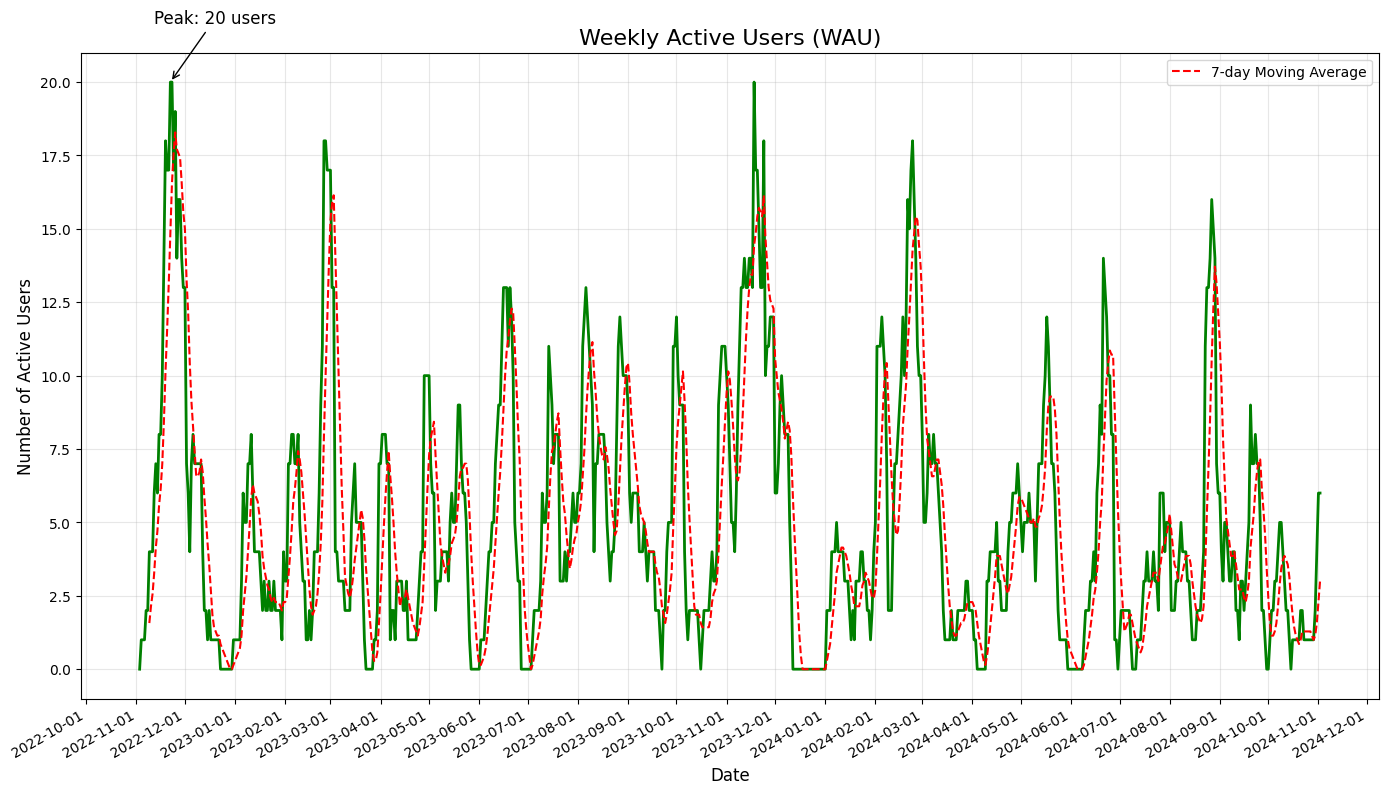

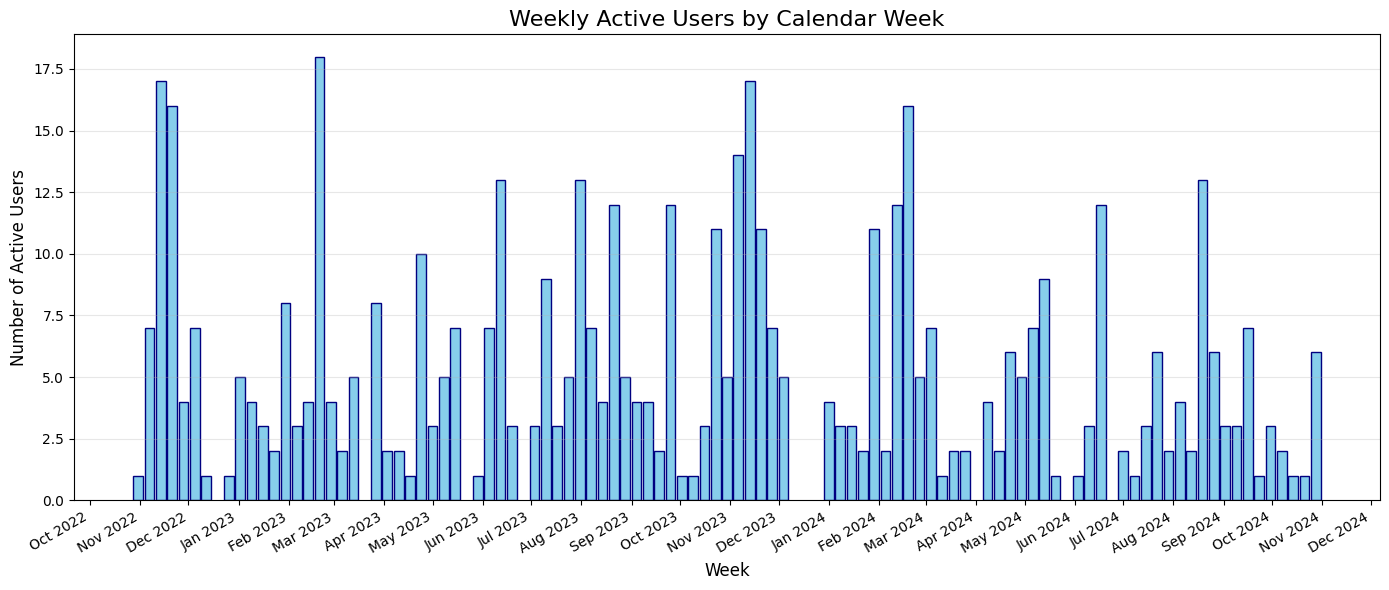

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime, timedelta

# First, ensure we have the timestamp and person columns
if 'timestamp' not in df.columns or 'person_name' not in df.columns:
    # Create separate functions to extract timestamp and person if needed
    def extract_timestamp(json_obj):
        try:
            return json_obj.get('timestamp', '')
        except:
            return ''

    def extract_person(json_obj):
        try:
            return json_obj.get('actor', {}).get('name', 'Unknown')
        except:
            return 'Unknown'

    # Apply the functions to create new columns if they don't exist
    if 'timestamp_str' not in df.columns:
        df['timestamp_str'] = df['parsed_json'].apply(extract_timestamp)
    if 'person_name' not in df.columns:
        df['person_name'] = df['parsed_json'].apply(extract_person)
    
    # Convert timestamp strings to datetime objects if needed
    if 'timestamp' not in df.columns:
        df['timestamp'] = pd.to_datetime(df['timestamp_str'])

# Sort by timestamp
df_sorted = df.sort_values('timestamp')

# Define the weekly activity window
weekly_window = timedelta(days=7)

# Create a daily time range for our analysis
start_date = df_sorted['timestamp'].min().floor('D')
end_date = df_sorted['timestamp'].max().ceil('D')
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Calculate weekly active users for each date
def calculate_weekly_active_users(dates, window=weekly_window):
    active_counts = []
    
    for date in dates:
        # Define the window end (current date)
        window_end = date
        # Define the window start (7 days before)
        window_start = window_end - window
        
        # Count unique users who had any activity in this 7-day window
        active_users = df_sorted[
            (df_sorted['timestamp'] >= window_start) & 
            (df_sorted['timestamp'] <= window_end)
        ]['person_name'].nunique()
        
        active_counts.append(active_users)
    
    return active_counts

# Calculate weekly active users
weekly_active_users = calculate_weekly_active_users(date_range)

# Create a weekly active users plot
plt.figure(figsize=(14, 8))

# Plot the weekly active users
plt.plot(date_range, weekly_active_users, 'g-', linewidth=2)

# Format the plot
plt.title('Weekly Active Users (WAU)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Active Users', fontsize=12)
plt.grid(True, alpha=0.3)

# Format the date axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

# Calculate and annotate the peak
peak_date_index = weekly_active_users.index(max(weekly_active_users))
peak_date = date_range[peak_date_index]
peak_users = weekly_active_users[peak_date_index]

plt.annotate(f'Peak: {peak_users} users',
             xy=(peak_date, peak_users),
             xytext=(peak_date - timedelta(days=10), peak_users * 1.1),
             arrowprops=dict(arrowstyle='->'),
             fontsize=12)

# Add a 7-day moving average trend line for smoothing
weekly_active_users_series = pd.Series(weekly_active_users, index=date_range)
weekly_active_users_ma = weekly_active_users_series.rolling(window=7).mean()
plt.plot(weekly_active_users_ma.index, weekly_active_users_ma.values, 'r--', 
         linewidth=1.5, label='7-day Moving Average')

plt.legend()
plt.tight_layout()

# Also create a plot showing weekly active users by calendar week
# This gives a clearer view of activity by week

# Group by calendar week
df_sorted['year_week'] = df_sorted['timestamp'].dt.strftime('%Y-%U')
weekly_users_by_calendar = df_sorted.groupby('year_week')['person_name'].nunique().reset_index()
weekly_users_by_calendar.columns = ['Year-Week', 'Active Users']

# Convert Year-Week to a proper datetime for the x-axis (use the Monday of each week)
def year_week_to_date(year_week):
    year, week = year_week.split('-')
    # Create a date for the Monday of this week
    # The %w format gives weekday (0=Sunday), so we use 1 for Monday
    date = datetime.strptime(f'{year} {week} 1', '%Y %U %w')
    return date

weekly_users_by_calendar['Date'] = weekly_users_by_calendar['Year-Week'].apply(year_week_to_date)
weekly_users_by_calendar = weekly_users_by_calendar.sort_values('Date')

# Plot the weekly users by calendar week
plt.figure(figsize=(14, 6))
plt.bar(weekly_users_by_calendar['Date'], weekly_users_by_calendar['Active Users'], 
        width=6, color='skyblue', edgecolor='navy')

# Format the plot
plt.title('Weekly Active Users by Calendar Week', fontsize=16)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Number of Active Users', fontsize=12)
plt.grid(True, axis='y', alpha=0.3)

# Format the date axis to show month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.tight_layout()

### Plot the Average number of 'experienced' over time

<Figure size 1400x1000 with 0 Axes>

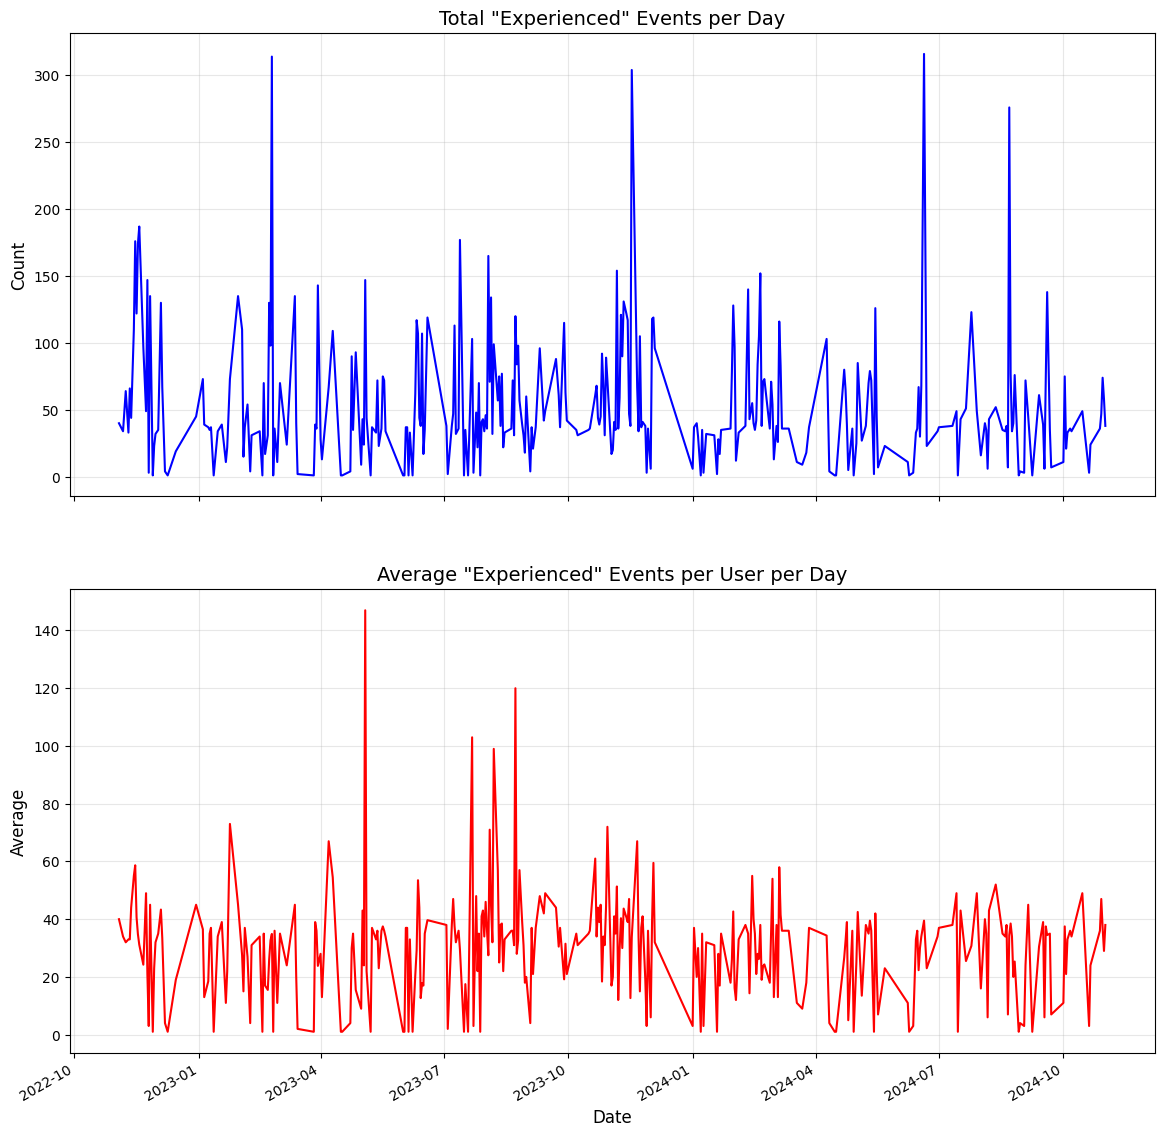

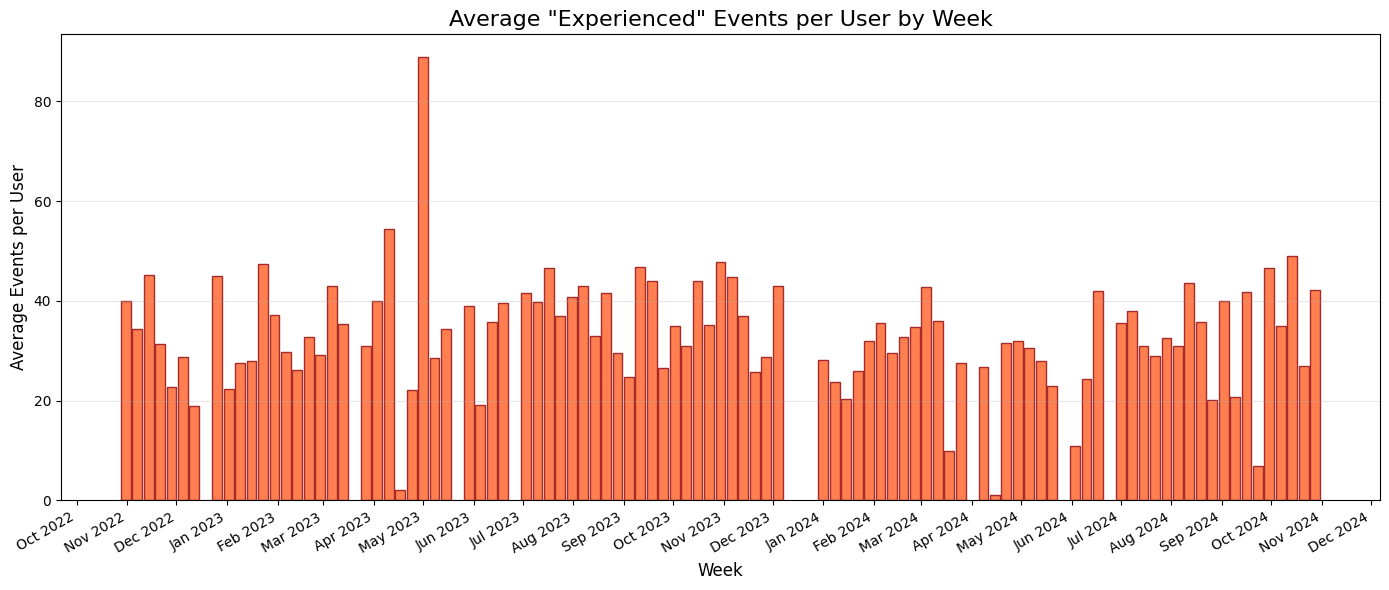

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime, timedelta

# First, ensure we have the timestamp column
if 'timestamp' not in df.columns:
    # Create function to extract timestamp if needed
    def extract_timestamp(json_obj):
        try:
            return json_obj.get('timestamp', '')
        except:
            return ''

    # Apply the function to create timestamp column if it doesn't exist
    if 'timestamp_str' not in df.columns:
        df['timestamp_str'] = df['parsed_json'].apply(extract_timestamp)
    
    # Convert timestamp strings to datetime objects if needed
    if 'timestamp' not in df.columns:
        df['timestamp'] = pd.to_datetime(df['timestamp_str'])

# Function to check if an event is an "experienced" event
def is_experienced_event(json_obj):
    try:
        # Check if the verb ID contains 'experienced'
        verb_id = json_obj.get('verb', {}).get('id', '')
        if 'experienced' in verb_id.lower():
            return True
            
        # Also check if the verb display explicitly says "experienced"
        verb_display = json_obj.get('verb', {}).get('display', {}).get('en-US', '')
        if verb_display.lower() == 'experienced':
            return True
            
        return False
    except:
        return False

# Apply the function to identify experienced events
df['is_experienced'] = df['parsed_json'].apply(is_experienced_event)

# Extract the person name if not already done
if 'person_name' not in df.columns:
    def extract_person(json_obj):
        try:
            return json_obj.get('actor', {}).get('name', 'Unknown')
        except:
            return 'Unknown'
    
    df['person_name'] = df['parsed_json'].apply(extract_person)

# Sort by timestamp
df_sorted = df.sort_values('timestamp')

# Group by day and calculate:
# 1. Number of "experienced" events
# 2. Number of unique users
# 3. Average experienced events per user
df_sorted['date'] = df_sorted['timestamp'].dt.date
daily_stats = df_sorted.groupby('date').agg(
    total_experienced=('is_experienced', lambda x: sum(x)),
    unique_users=('person_name', 'nunique')
).reset_index()

# Calculate the average experienced events per user
daily_stats['avg_experienced_per_user'] = daily_stats['total_experienced'] / daily_stats['unique_users']

# Replace any NaN values (from days with no users) with 0
daily_stats = daily_stats.fillna(0)

# Create a time series plot
plt.figure(figsize=(14, 10))

# Create a figure with 2 subplots
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(14, 15), sharex=True)

# Plot 1: Total experienced events per day
ax1.plot(daily_stats['date'], daily_stats['total_experienced'], 'b-')
ax1.set_title('Total "Experienced" Events per Day', fontsize=14)
ax1.set_ylabel('Count', fontsize=12)
ax1.grid(True, alpha=0.3)

# Plot 3: Average experienced events per user
ax3.plot(daily_stats['date'], daily_stats['avg_experienced_per_user'], 'r-')
ax3.set_title('Average "Experienced" Events per User per Day', fontsize=14)
ax3.set_xlabel('Date', fontsize=12)
ax3.set_ylabel('Average', fontsize=12)
ax3.grid(True, alpha=0.3)

# Format the date axis
fig.autofmt_xdate()

# Create a weekly view as well
df_sorted['year_week'] = df_sorted['timestamp'].dt.strftime('%Y-%U')
weekly_stats = df_sorted.groupby('year_week').agg(
    total_experienced=('is_experienced', lambda x: sum(x)),
    unique_users=('person_name', 'nunique')
).reset_index()

weekly_stats['avg_experienced_per_user'] = weekly_stats['total_experienced'] / weekly_stats['unique_users']
weekly_stats = weekly_stats.fillna(0)

# Convert Year-Week to a date (using the Monday of each week) for better plotting
def year_week_to_date(year_week):
    year, week = year_week.split('-')
    # Create a date for the Monday of this week
    date = datetime.strptime(f'{year} {week} 1', '%Y %U %w')
    return date

weekly_stats['date'] = weekly_stats['year_week'].apply(year_week_to_date)
weekly_stats = weekly_stats.sort_values('date')

# Create a bar chart for weekly average
plt.figure(figsize=(14, 6))
plt.bar(weekly_stats['date'], weekly_stats['avg_experienced_per_user'], 
        width=6, color='coral', edgecolor='brown')

plt.title('Average "Experienced" Events per User by Week', fontsize=16)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Average Events per User', fontsize=12)
plt.grid(True, axis='y', alpha=0.3)

# Format the date axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.tight_layout()

### Visualizations

Scatterplot: x axis duration of registration id, y axis slides experienced

Line of count of users completing the module. Is this going down?

Line of number of slides experienced per user. Is this going down?

Total registrations analyzed: 624
Duration statistics (hours): Min=0.00, Max=15546.29, Mean=26.36, Median=0.26
Slides experienced statistics: Min=0, Max=34, Mean=22.92, Median=31


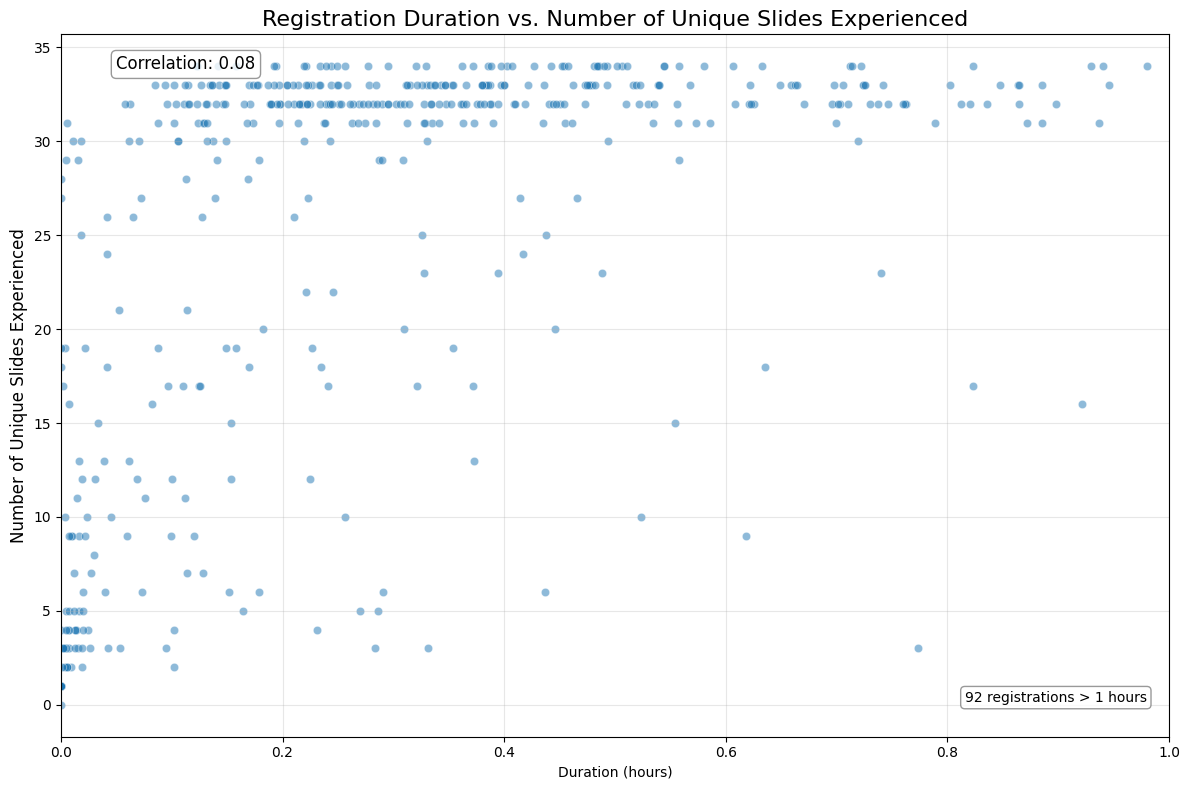

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# First, ensure we have the necessary columns
if 'timestamp' not in df.columns or 'parsed_json' not in df.columns:
    print("Required columns not found in dataframe")
else:
    # Extract registration ID, timestamp, and check for "experienced" events
    def extract_data(json_obj):
        try:
            registration_id = json_obj.get('context', {}).get('registration', '')
            timestamp = json_obj.get('timestamp', '')
            
            # Check if this is an "experienced" event
            verb_id = json_obj.get('verb', {}).get('id', '')
            verb_display = json_obj.get('verb', {}).get('display', {}).get('en-US', '')
            is_experienced = ('experienced' in verb_id.lower() or 
                             verb_display.lower() == 'experienced')
            
            # Get description/slide name
            description = json_obj.get('object', {}).get('definition', {}).get('description', {}).get('und', '')
            
            return pd.Series([registration_id, timestamp, is_experienced, description])
        except:
            return pd.Series(['', '', False, ''])

    # Extract data if not already present
    if 'registration_id' not in df.columns:
        df[['registration_id', 'timestamp_str', 'is_experienced', 'description']] = df['parsed_json'].apply(extract_data)
    
    # Convert timestamp to datetime if needed
    if 'timestamp' not in df.columns or not pd.api.types.is_datetime64_dtype(df['timestamp']):
        df['timestamp'] = pd.to_datetime(df['timestamp_str'])

    # Calculate duration for each registration
    # First, get the earliest and latest timestamp for each registration
    registration_times = df.groupby('registration_id').agg(
        start_time=('timestamp', 'min'),
        end_time=('timestamp', 'max')
    )
    
    # Calculate duration in hours
    registration_times['duration_hours'] = (registration_times['end_time'] - 
                                          registration_times['start_time']).dt.total_seconds() / 3600
    
    # Count unique slides experienced for each registration
    # Filter to only include "experienced" events
    experienced_df = df[df['is_experienced']]
    
    # Count unique descriptions/slides per registration
    slides_per_registration = experienced_df.groupby('registration_id')['description'].nunique().reset_index()
    slides_per_registration.columns = ['registration_id', 'unique_slides_experienced']
    
    # Merge duration data with slides data
    registration_data = pd.merge(
        registration_times.reset_index(), 
        slides_per_registration,
        on='registration_id',
        how='outer'
    )
    
    # Fill missing values with 0 for slides (registrations with no experienced events)
    registration_data['unique_slides_experienced'] = registration_data['unique_slides_experienced'].fillna(0)

    # Create scatterplot
    plt.figure(figsize=(12, 8))
    
    # Use a regular linear scale for duration, but limit the x-axis
    duration_max = registration_data['duration_hours'].max()
    
    # Set a reasonable upper limit for the x-axis (e.g., 48 hours = 2 days)
    x_limit = 1  # Can be adjusted based on your preference
    
    plt.xlabel('Duration (hours)')
    plt.xlim(0, x_limit)
    
    # Count and annotate how many points are beyond our x-limit
    points_beyond_limit = (registration_data['duration_hours'] > x_limit).sum()
    if points_beyond_limit > 0:
        plt.annotate(f'{points_beyond_limit} registrations > {x_limit} hours', 
                    xy=(0.98, 0.05), 
                    xycoords='axes fraction',
                    fontsize=10,
                    ha='right',
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
    
    # Create the scatter plot
    plt.scatter(
        registration_data['duration_hours'], 
        registration_data['unique_slides_experienced'],
        alpha=0.5,
        edgecolors='w',
        linewidth=0.5
    )
    
    # Calculate and display correlation coefficient only (no trend line)
    try:
        # Filter out extreme outliers for the correlation calculation
        duration_median = registration_data['duration_hours'].median()
        duration_std = registration_data['duration_hours'].std()
        
        filtered_data = registration_data[
            registration_data['duration_hours'] <= duration_median + 5 * duration_std
        ]
        
        # Calculate correlation coefficient
        corr = filtered_data['duration_hours'].corr(filtered_data['unique_slides_experienced'])
        plt.annotate(f'Correlation: {corr:.2f}', 
                    xy=(0.05, 0.95), 
                    xycoords='axes fraction',
                    fontsize=12,
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
    except:
        print("Could not calculate correlation")
    
    # Add title and labels
    plt.title('Registration Duration vs. Number of Unique Slides Experienced', fontsize=16)
    plt.ylabel('Number of Unique Slides Experienced', fontsize=12)
    
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    # No histogram or additional plots
    
    # Print some summary statistics
    print(f"Total registrations analyzed: {len(registration_data)}")
    print(f"Duration statistics (hours): Min={registration_data['duration_hours'].min():.2f}, "
          f"Max={registration_data['duration_hours'].max():.2f}, "
          f"Mean={registration_data['duration_hours'].mean():.2f}, "
          f"Median={registration_data['duration_hours'].median():.2f}")
    print(f"Slides experienced statistics: Min={registration_data['unique_slides_experienced'].min():.0f}, "
          f"Max={registration_data['unique_slides_experienced'].max():.0f}, "
          f"Mean={registration_data['unique_slides_experienced'].mean():.2f}, "
          f"Median={registration_data['unique_slides_experienced'].median():.0f}")

Number of users who completed all 54 slides: 41


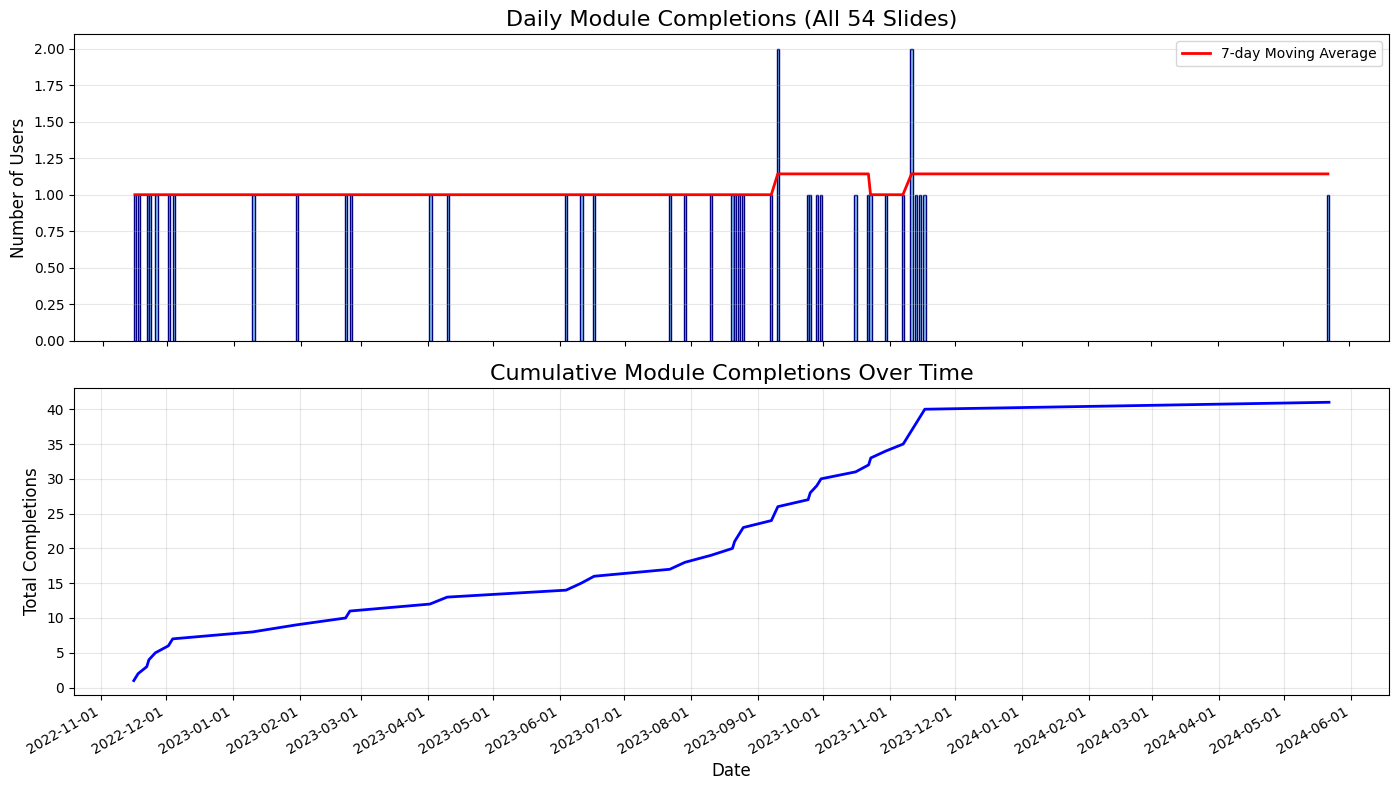

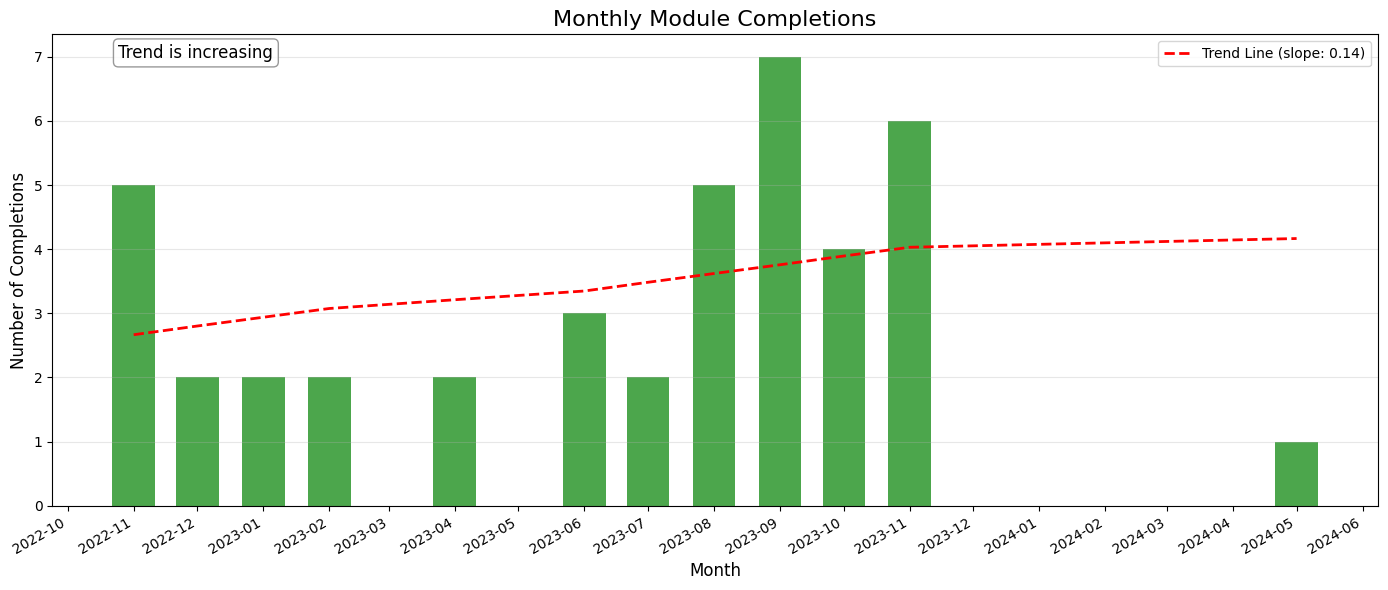

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime, timedelta

# Assuming slides_per_person already exists with person and slide count

# Let's first see how many people completed all 54 slides
REQUIRED_SLIDES = 54
completers = slides_per_person[slides_per_person['Unique Slides Viewed'] >= REQUIRED_SLIDES]
print(f"Number of users who completed all {REQUIRED_SLIDES} slides: {len(completers)}")

# Now we need to get the timestamp information for when they completed
# Extract timestamp and person information from the original data
def extract_timestamp_person(json_obj):
    try:
        timestamp = json_obj.get('timestamp', '')
        person_name = json_obj.get('actor', {}).get('name', 'Unknown')
        return pd.Series([timestamp, person_name])
    except:
        return pd.Series(['', 'Unknown'])

# Apply the extraction if needed
if 'timestamp' not in df.columns or 'person_name' not in df.columns:
    df[['timestamp_str', 'person_name']] = df['parsed_json'].apply(extract_timestamp_person)
    df['timestamp'] = pd.to_datetime(df['timestamp_str'])

# Get the last timestamp for each person - this is when they "completed" the module
last_timestamps = df.groupby('person_name')['timestamp'].max().reset_index()
last_timestamps.columns = ['Person', 'Last Activity']

# Merge with the completers data to get completion times
completers_with_time = pd.merge(completers, last_timestamps, on='Person', how='left')

# Extract just the date part of the timestamp
completers_with_time['Completion Date'] = completers_with_time['Last Activity'].dt.date

# Create a count of completions by date
completions_by_date = completers_with_time.groupby('Completion Date').size().reset_index()
completions_by_date.columns = ['Date', 'Completions']

# Convert date to datetime for better plotting
completions_by_date['Date'] = pd.to_datetime(completions_by_date['Date'])

# Sort by date
completions_by_date = completions_by_date.sort_values('Date')

# Calculate cumulative completions
completions_by_date['Cumulative Completions'] = completions_by_date['Completions'].cumsum()

# Plot the daily completions
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)
plt.bar(completions_by_date['Date'], completions_by_date['Completions'], 
        width=1, color='skyblue', edgecolor='navy')
plt.title(f'Daily Module Completions (All {REQUIRED_SLIDES} Slides)', fontsize=16)
plt.ylabel('Number of Users', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')

# Format the date axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

# Add 7-day moving average
plt.plot(completions_by_date['Date'], 
         completions_by_date['Completions'].rolling(window=7, min_periods=1).mean(), 
         'r-', linewidth=2, label='7-day Moving Average')
plt.legend()

# Plot the cumulative completions
plt.subplot(2, 1, 2)
plt.plot(completions_by_date['Date'], completions_by_date['Cumulative Completions'], 
         'b-', linewidth=2)
plt.title('Cumulative Module Completions Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Completions', fontsize=12)
plt.grid(True, alpha=0.3)

# Format the date axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.tight_layout()

# Monthly trend analysis
completions_by_date['Month'] = completions_by_date['Date'].dt.to_period('M')
monthly_completions = completions_by_date.groupby('Month')['Completions'].sum().reset_index()
monthly_completions['Month'] = monthly_completions['Month'].dt.to_timestamp()

# Plot monthly completions
plt.figure(figsize=(14, 6))
plt.bar(monthly_completions['Month'], monthly_completions['Completions'], 
        width=20, color='green', alpha=0.7)
plt.title('Monthly Module Completions', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Completions', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')

# Format the date axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

# Add trend line if we have enough months
if len(monthly_completions) >= 3:
    # Convert to numpy arrays for trend calculation
    x = np.arange(len(monthly_completions))
    y = monthly_completions['Completions'].values
    
    # Calculate trend
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    
    # Plot trend line
    plt.plot(monthly_completions['Month'], p(x), "r--", linewidth=2, 
             label=f'Trend Line (slope: {z[0]:.2f})')
    
    # Indicate trend direction
    trend_direction = "increasing" if z[0] > 0 else "decreasing"
    plt.annotate(f"Trend is {trend_direction}", 
                xy=(0.05, 0.95), 
                xycoords='axes fraction',
                fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
    
    plt.legend()

plt.tight_layout()

Extracting data from JSON...


/tmp/ipykernel_230/1656260893.py:51: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(key='timestamp', freq='M'),


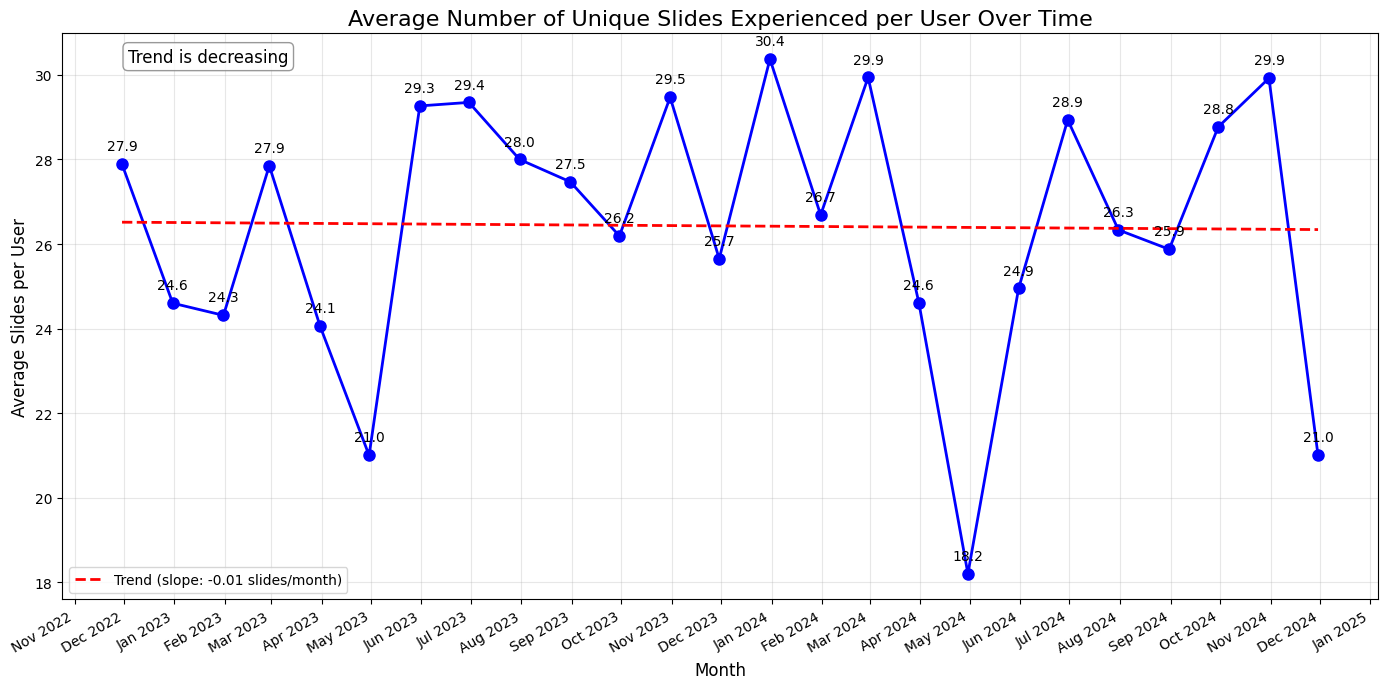


Users per month:
Month
2022-11-30 00:00:00+00:00    44
2022-12-31 00:00:00+00:00    10
2023-01-31 00:00:00+00:00    16
2023-02-28 00:00:00+00:00    27
2023-03-31 00:00:00+00:00    16
2023-04-30 00:00:00+00:00    15
2023-05-31 00:00:00+00:00    15
2023-06-30 00:00:00+00:00    20
2023-07-31 00:00:00+00:00    20
2023-08-31 00:00:00+00:00    34
2023-09-30 00:00:00+00:00    21
2023-10-31 00:00:00+00:00    17
2023-11-30 00:00:00+00:00    43
2023-12-31 00:00:00+00:00     8
2024-01-31 00:00:00+00:00    16
2024-02-29 00:00:00+00:00    34
2024-03-31 00:00:00+00:00    13
2024-04-30 00:00:00+00:00    15
2024-05-31 00:00:00+00:00    20
2024-06-30 00:00:00+00:00    16
2024-07-31 00:00:00+00:00    12
2024-08-31 00:00:00+00:00    24
2024-09-30 00:00:00+00:00    13
2024-10-31 00:00:00+00:00    13
2024-11-30 00:00:00+00:00     1
Name: Person, dtype: int64


In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime, timedelta

# Make sure to run this at the top of your notebook
%matplotlib inline

# Extract key information from JSON
def extract_data(json_obj):
    try:
        timestamp = json_obj.get('timestamp', '')
        person_name = json_obj.get('actor', {}).get('name', 'Unknown')
        
        # Check if this is an "experienced" event
        verb_id = json_obj.get('verb', {}).get('id', '')
        verb_display = json_obj.get('verb', {}).get('display', {}).get('en-US', '')
        is_experienced = ('experienced' in verb_id.lower() or 
                         verb_display.lower() == 'experienced')
        
        # Get slide info - try multiple paths
        slide_id = None
        if 'object' in json_obj:
            obj = json_obj['object']
            # Try description first
            if 'definition' in obj and 'description' in obj['definition'] and 'und' in obj['definition']['description']:
                slide_id = obj['definition']['description']['und']
            # Try name if description not available
            elif 'definition' in obj and 'name' in obj['definition'] and 'und' in obj['definition']['name']:
                slide_id = obj['definition']['name']['und']
            # Fall back to object ID if nothing else works
            elif 'id' in obj:
                slide_id = obj['id']
                
        return pd.Series([timestamp, person_name, is_experienced, slide_id])
    except:
        return pd.Series(['', 'Unknown', False, None])

# Extract data
print("Extracting data from JSON...")
df_analysis = pd.DataFrame()
df_analysis[['timestamp_str', 'person_name', 'is_experienced', 'slide_id']] = df['parsed_json'].apply(extract_data)
df_analysis['timestamp'] = pd.to_datetime(df_analysis['timestamp_str'])

# Filter to experienced events with valid slide IDs
experienced_df = df_analysis[df_analysis['is_experienced'] & df_analysis['slide_id'].notna()]

# Group by month and person, count unique slides per person
monthly_user_slides = experienced_df.groupby([
    pd.Grouper(key='timestamp', freq='M'),
    'person_name'
])['slide_id'].nunique().reset_index()

monthly_user_slides.columns = ['Month', 'Person', 'Unique_Slides']

# Calculate average slides per user for each month
monthly_avg_slides = monthly_user_slides.groupby('Month')['Unique_Slides'].mean().reset_index()

# Plot average slides per user over time
plt.figure(figsize=(14, 7))
plt.plot(monthly_avg_slides['Month'], monthly_avg_slides['Unique_Slides'], 'b-o', linewidth=2, markersize=8)
plt.title('Average Number of Unique Slides Experienced per User Over Time', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Slides per User', fontsize=12)
plt.grid(True, alpha=0.3)

# Add trend line
if len(monthly_avg_slides) >= 3:
    x = np.arange(len(monthly_avg_slides))
    y = monthly_avg_slides['Unique_Slides'].values
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(monthly_avg_slides['Month'], p(x), "r--", linewidth=2, 
             label=f'Trend (slope: {z[0]:.2f} slides/month)')
    trend_direction = "increasing" if z[0] > 0 else "decreasing"
    plt.annotate(f"Trend is {trend_direction}", xy=(0.05, 0.95), 
                xycoords='axes fraction', fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
    plt.legend()

# Format the date axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

# Add data points to the plot
for i, row in monthly_avg_slides.iterrows():
    plt.annotate(f"{row['Unique_Slides']:.1f}", 
                (row['Month'], row['Unique_Slides']), 
                textcoords="offset points", 
                xytext=(0,10), 
                ha='center')

plt.tight_layout()
plt.show()

# Also show the number of users per month to check sample sizes
monthly_user_count = monthly_user_slides.groupby('Month')['Person'].nunique()
print("\nUsers per month:")
print(monthly_user_count)